# Importing data

In [1]:
import pandas as pd

# Set the maximum number of rows to display to a large number
pd.set_option('display.max_columns', None)

In [2]:
from ucimlrepo import fetch_ucirepo

# Fetch dataset
data = fetch_ucirepo(id=697)

# Create a single DataFrame during import
df = data.data.original

# Check the structure of the DataFrame
df.head(20)


,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,9,7,114.8,0,0,1,1,1,0,50,0,0,5,10,5,11.857143,0,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,7,10,128.4,1,0,0,1,0,1,18,0,0,7,9,7,13.300000,0,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,9,9,113.1,1,0,0,0,1,0,22,0,0,5,5,0,0.000000,0,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,9,9,129.3,0,0,0,1,0,1,21,1,0,6,8,6,13.875000,0,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,4,7,123.0,1,0,1,0,0,0,18,0,0,6,9,5,11.400000,0,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [4]:
# 4424 entries and 4424 non-null values in each column 
# But just to verify
df.isnull().all()

Marital Status                                    False
Application mode                                  False
Application order                                 False
Course                                            False
Daytime/evening attendance                        False
Previous qualification                            False
Previous qualification (grade)                    False
Nacionality                                       False
Mother's qualification                            False
Father's qualification                            False
Mother's occupation                               False
Father's occupation                               False
Admission grade                                   False
Displaced                                         False
Educational special needs                         False
Debtor                                            False
Tuition fees up to date                           False
Gender                                          

The dataset and information about it can be found here: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success 

The following columns are categorical (some represented numerically):
* Marital status
* Application mode
* Course
* Daytime/evening attendance
* Previous qualification
* Nacionality
* Mother's qualification
* Father's qualification
* Mother's occupation
* Father's occupation
* Displaced
* Educational special needs
* Debtor
* Tuition fees up to date
* Gender
* Scholarship holder
* International
* Target

The following columns are numerical (discrete):
* Application order
* Age at enrollment
* Curricular units 1st sem (credited)             
* Curricular units 1st sem (enrolled)
* Curricular units 1st sem (evaluations)
* Curricular units 1st sem (approved)
* Curricular units 1st sem (without evaluations)
* Curricular units 2nd sem (credited)
* Curricular units 2nd sem (enrolled)
* Curricular units 2nd sem (evaluations)
* Curricular units 2nd sem (approved)
* Curricular units 2nd sem (without evaluations)

The following columns are numerical (continuous):
* Previous qualification (grade)
* Admission grade
* Curricular units 1st sem (grade)
* Curricular units 2nd sem (grade)
* Unemployment rate
* Inflation rate
* GDP

In [5]:
# Check the number of 0s in each column
for col in df.columns:
    zeros_in_col = (df[col] == 0).sum()
    print(f"Zeros in {col} column: {zeros_in_col}")

Zeros in Marital Status column: 0
Zeros in Application mode column: 0
Zeros in Application order column: 1
Zeros in Course column: 0
Zeros in Daytime/evening attendance column: 483
Zeros in Previous qualification column: 0
Zeros in Previous qualification (grade) column: 0
Zeros in Nacionality column: 0
Zeros in Mother's qualification column: 0
Zeros in Father's qualification column: 0
Zeros in Mother's occupation column: 144
Zeros in Father's occupation column: 128
Zeros in Admission grade column: 0
Zeros in Displaced column: 1998
Zeros in Educational special needs column: 4373
Zeros in Debtor column: 3921
Zeros in Tuition fees up to date column: 528
Zeros in Gender column: 2868
Zeros in Scholarship holder column: 3325
Zeros in Age at enrollment column: 0
Zeros in International column: 4314
Zeros in Curricular units 1st sem (credited) column: 3847
Zeros in Curricular units 1st sem (enrolled) column: 180
Zeros in Curricular units 1st sem (evaluations) column: 349
Zeros in Curricular uni

In [6]:
# Check the unique values in each column
# cols_not_to_check_unique_vals_in = ["Height", "Weight", ]
for col in df:
# if col not in cols_not_to_check_unique_vals_in:
        # print(col)
        print(f"{col} column no. unique values: {df[col].nunique()}")

Marital Status column no. unique values: 6
Application mode column no. unique values: 18
Application order column no. unique values: 8
Course column no. unique values: 17
Daytime/evening attendance column no. unique values: 2
Previous qualification column no. unique values: 17
Previous qualification (grade) column no. unique values: 101
Nacionality column no. unique values: 21
Mother's qualification column no. unique values: 29
Father's qualification column no. unique values: 34
Mother's occupation column no. unique values: 32
Father's occupation column no. unique values: 46
Admission grade column no. unique values: 620
Displaced column no. unique values: 2
Educational special needs column no. unique values: 2
Debtor column no. unique values: 2
Tuition fees up to date column no. unique values: 2
Gender column no. unique values: 2
Scholarship holder column no. unique values: 2
Age at enrollment column no. unique values: 46
International column no. unique values: 2
Curricular units 1st s

In [7]:
# Continuous columns - Previous qualification (grade), Admission grade, Unemployment rate, Inflation rate, GDP
# Can be found here - https://storage.googleapis.com/kaggle-forum-message-attachments/1832313/17922/Features%20information.pdf
# Check the unique values in the discrete columns
cols_not_to_check_unique_vals_in = ["Previous qualification (grade)", "Admission grade", "Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)"]
for col in df.columns:
    if col not in cols_not_to_check_unique_vals_in:
        print(f"Unique values in {col} column: {df[col].unique()}")

Unique values in Marital Status column: [1 2 4 3 5 6]
Unique values in Application mode column: [17 15  1 39 18 53 44 51 43  7 42 16  5  2 10 57 26 27]
Unique values in Application order column: [5 1 2 4 3 6 9 0]
Unique values in Course column: [ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9556 9147
 9003   33 9119]
Unique values in Daytime/evening attendance column: [1 0]
Unique values in Previous qualification column: [ 1 19 42 39 10  3 40  2  4 12 43 15  6  9 38  5 14]
Unique values in Nacionality column: [  1  62   6  41  26 103  13  25  21 101  11  22  32 100  24 109   2 108
 105  14  17]
Unique values in Mother's qualification column: [19  1 37 38  3  4 42  2 34 12 40  9  5 39 11 41 30 14 35 36  6 10 29 43
 18 22 27 26 44]
Unique values in Father's qualification column: [12  3 37 38  1 19  5  4 34  2 39 11  9 36 26 40 14 20 35 41 22 13 29 43
 18 42 10  6 30 25 44 33 27 31]
Unique values in Mother's occupation column: [  5   3   9   7   4   1 125   0   6   2  90   8

Marital Status


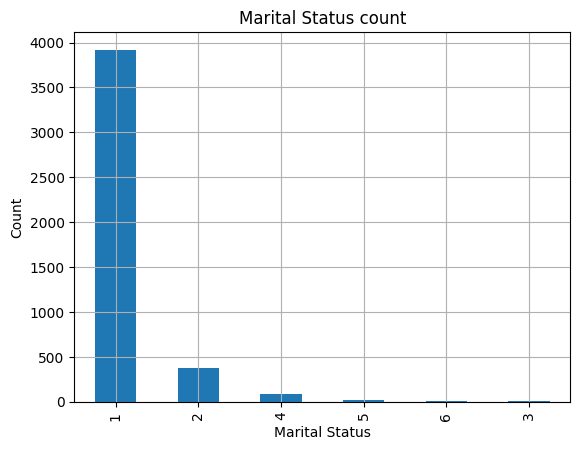

Application mode


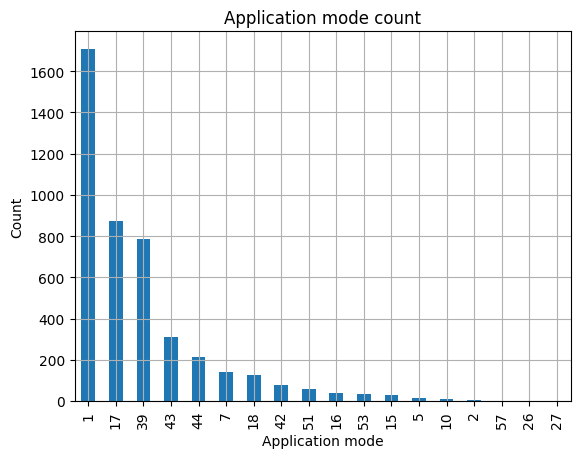

Course


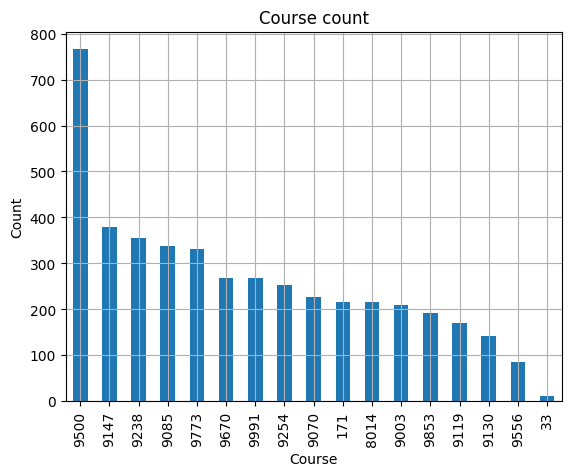

Daytime/evening attendance


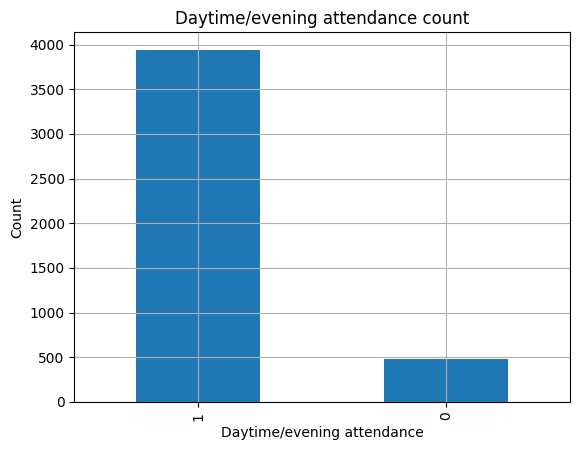

Previous qualification


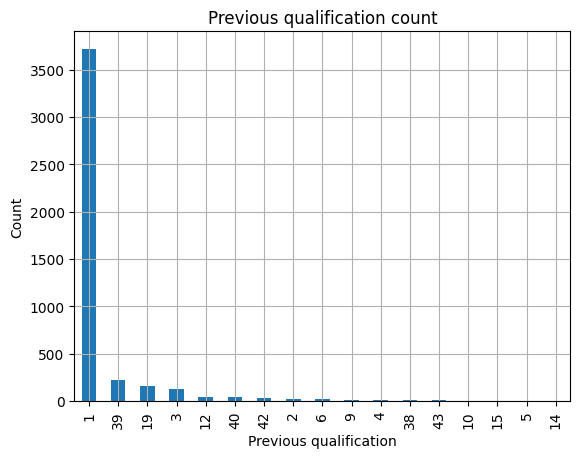

Nacionality


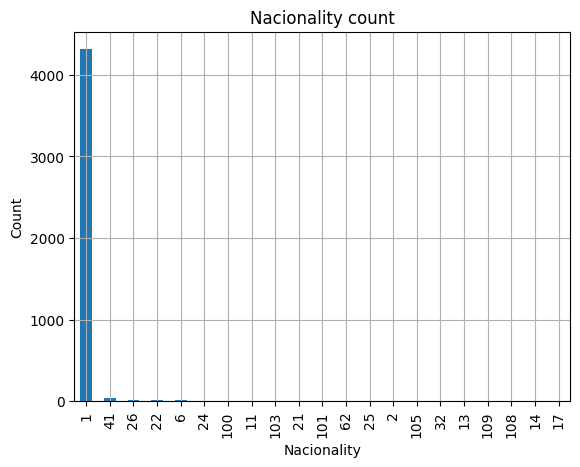

Mother's qualification


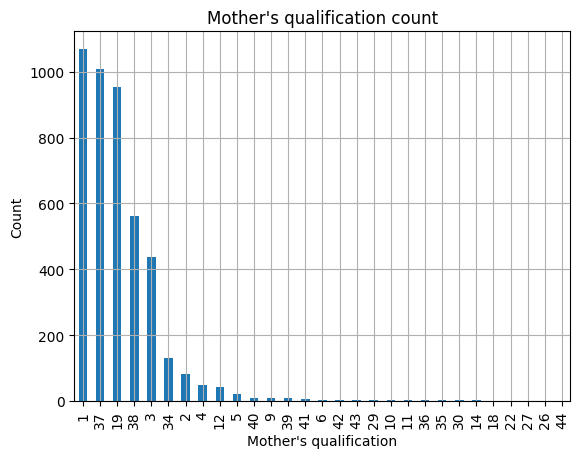

Father's qualification


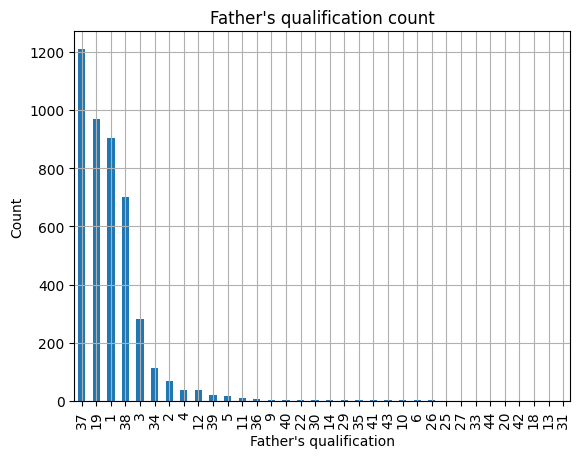

Mother's occupation


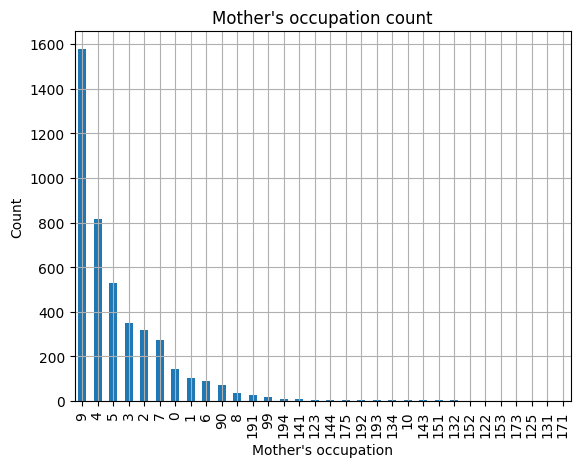

Father's occupation


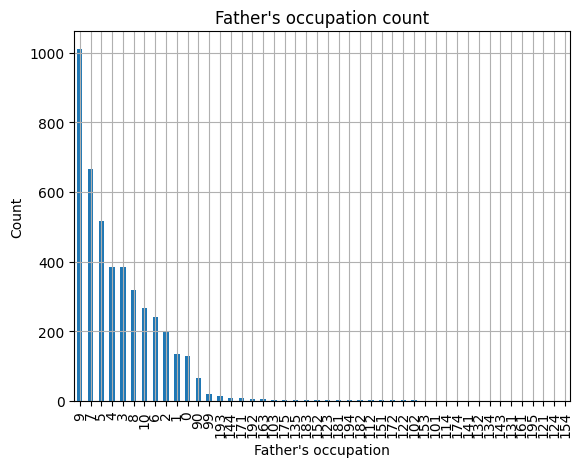

Displaced


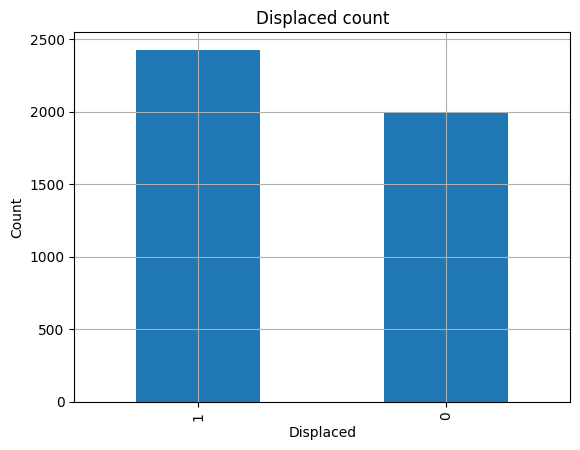

Educational special needs


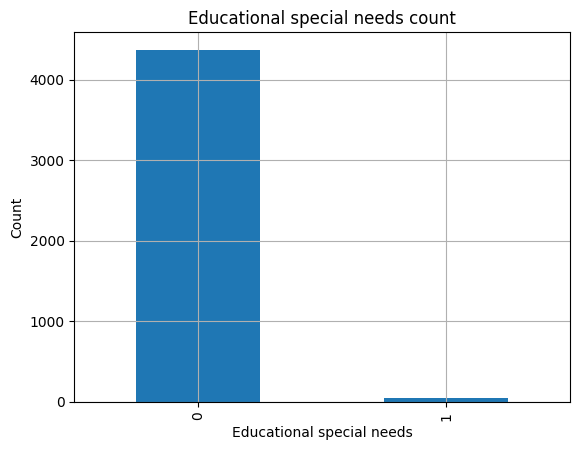

Debtor


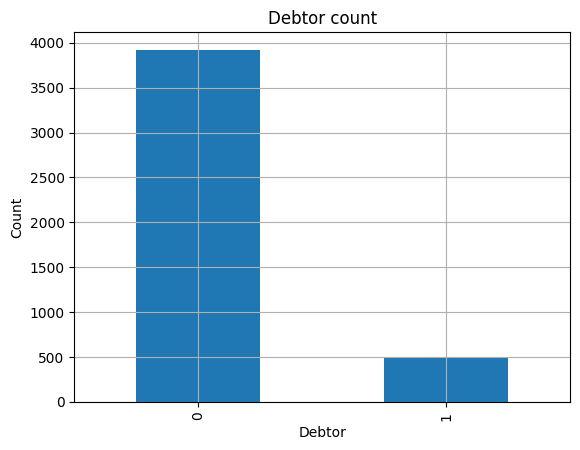

Tuition fees up to date


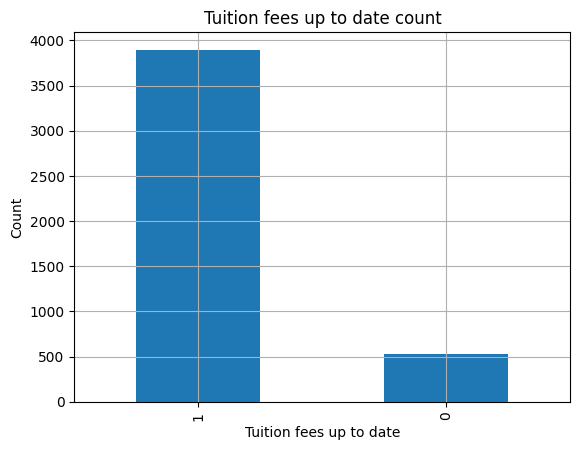

Gender


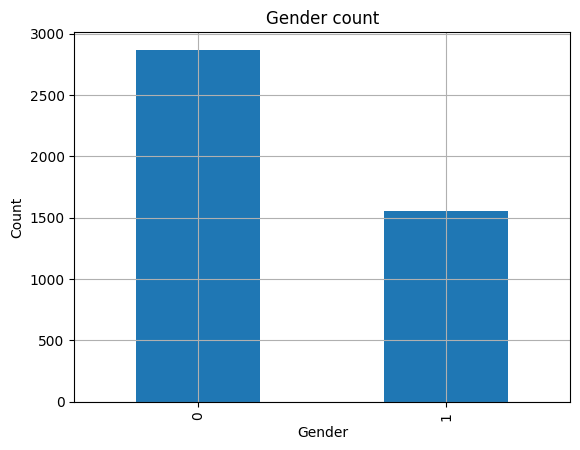

Scholarship holder


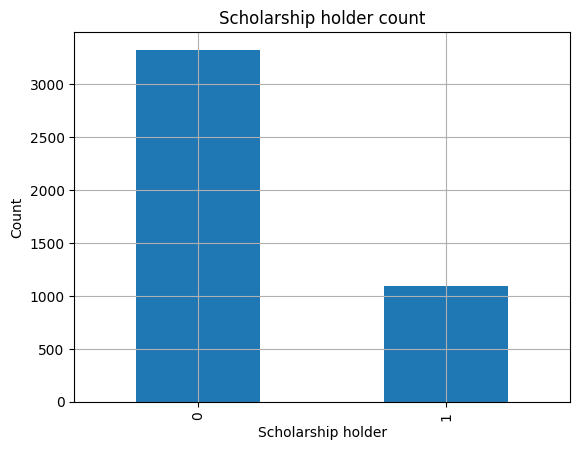

International


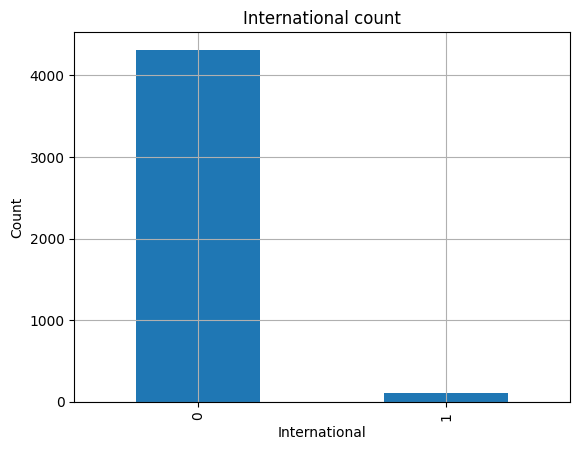

Target


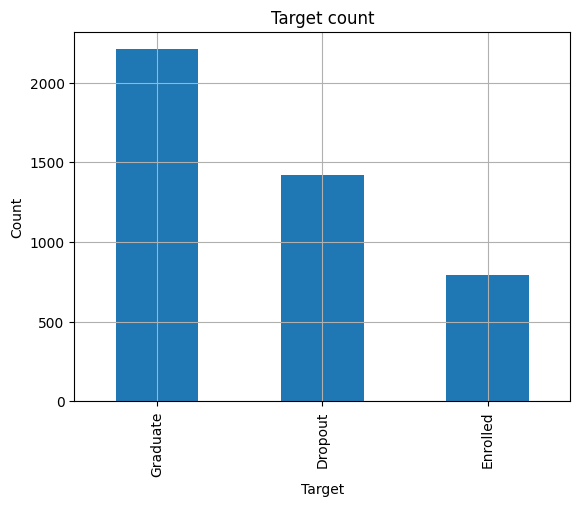

In [8]:
# Do some plotting next to understand the data

categorical_cols = [
    "Marital Status",
    "Application mode",
    "Course",
    "Daytime/evening attendance",
    "Previous qualification",
    "Nacionality",
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Displaced",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Gender",
    "Scholarship holder",
    "International",
    "Target"
]

import matplotlib.pyplot as plt

for col in categorical_cols:
    print(col)
    value_counts = df[col].value_counts()
    value_counts.plot(kind='bar')
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.grid()
    plt.title(f"{col} count")
    plt.show()

Application order


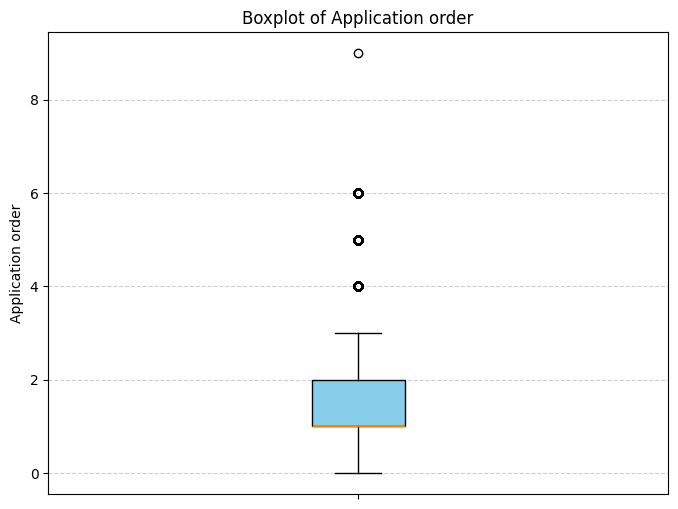

Age at enrollment


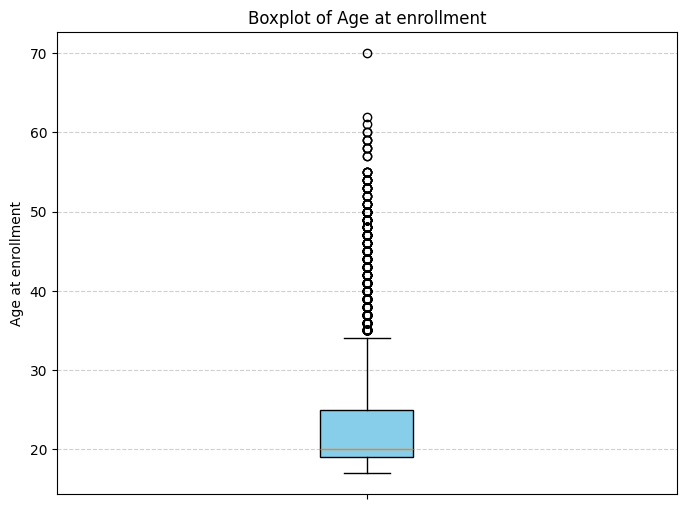

Curricular units 1st sem (credited)


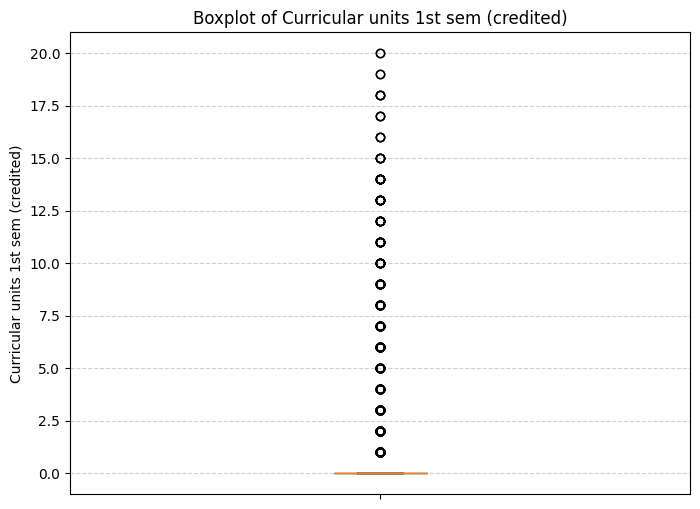

Curricular units 1st sem (enrolled)


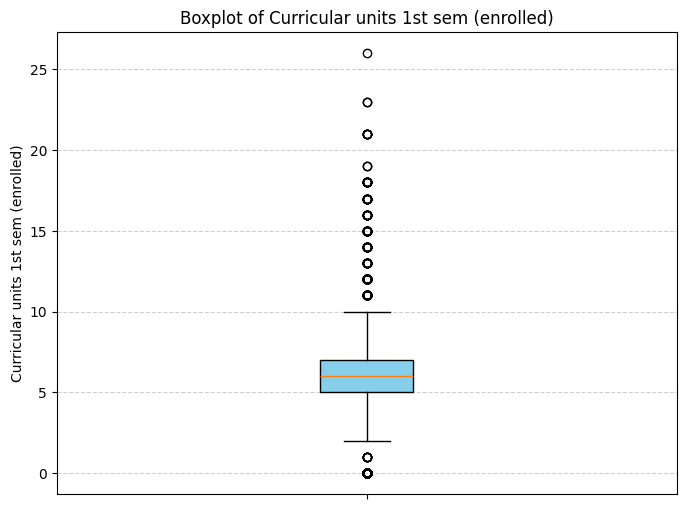

Curricular units 1st sem (evaluations)


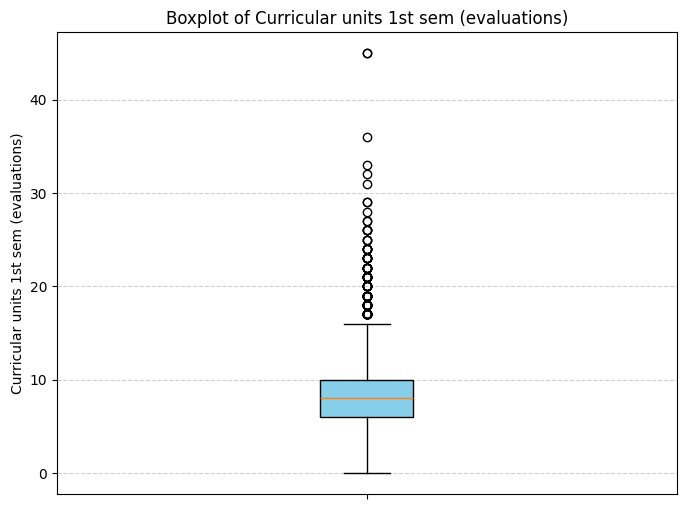

Curricular units 1st sem (approved)


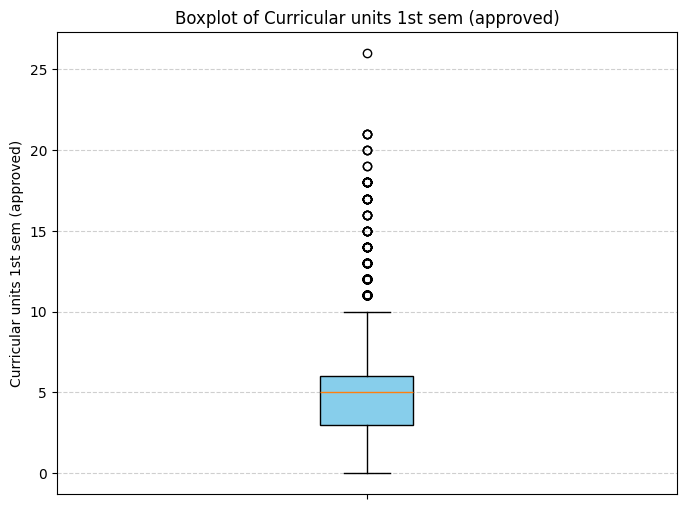

Curricular units 1st sem (without evaluations)


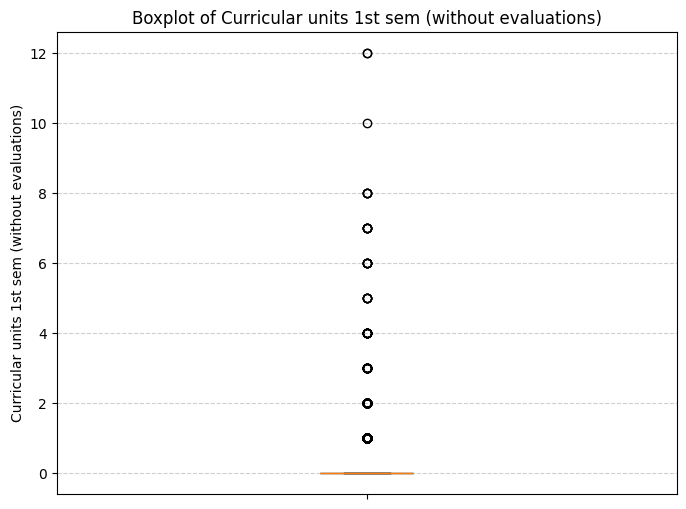

Curricular units 2nd sem (credited)


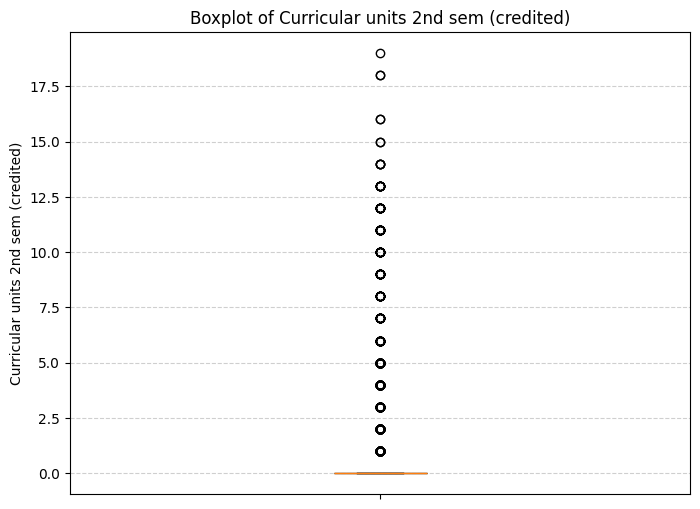

Curricular units 2nd sem (enrolled)


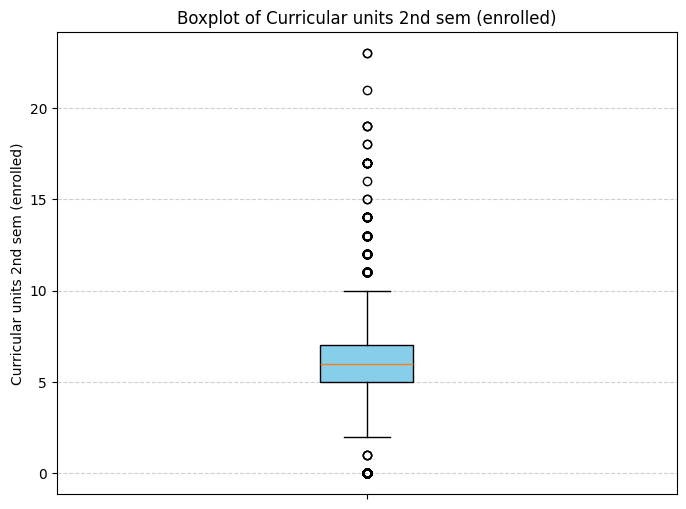

Curricular units 2nd sem (evaluations)


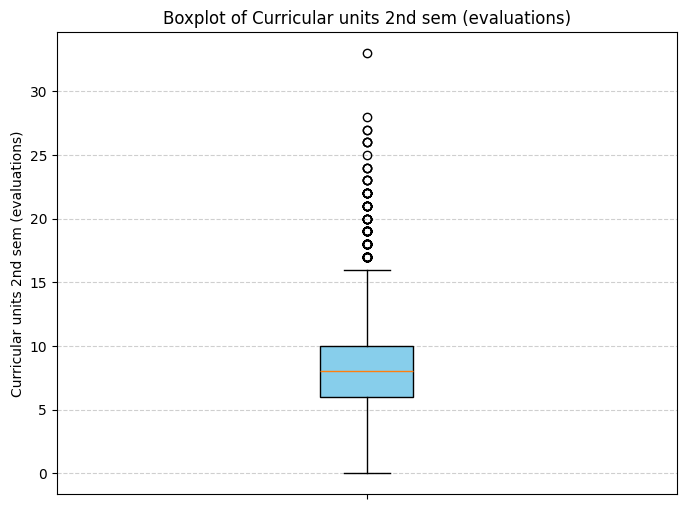

Curricular units 2nd sem (approved)


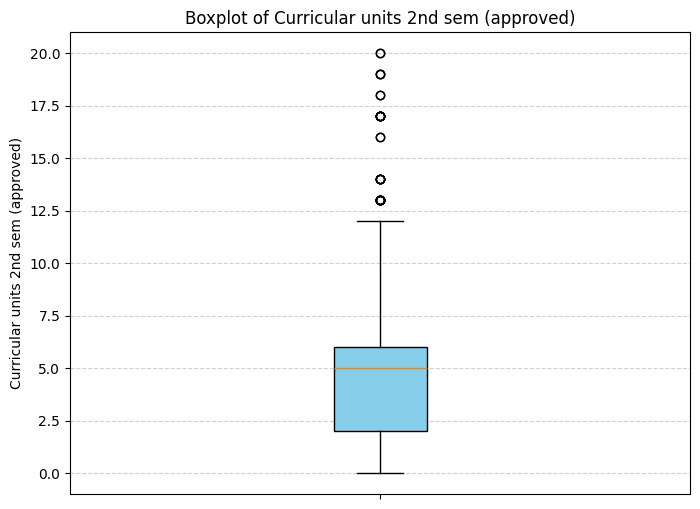

Curricular units 2nd sem (without evaluations)


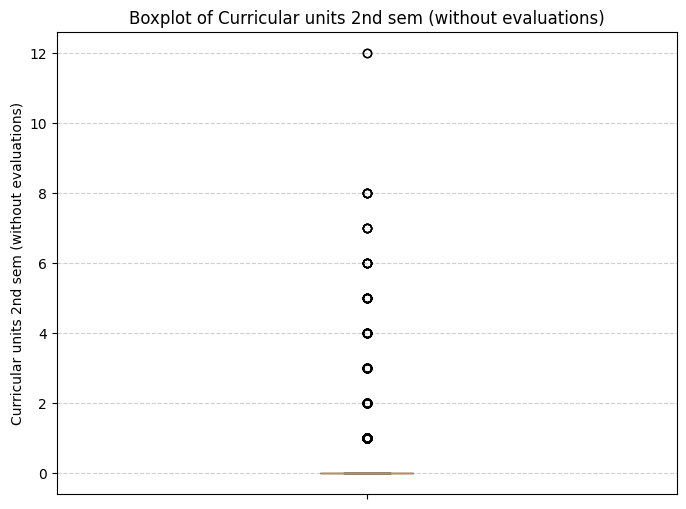

Previous qualification (grade)


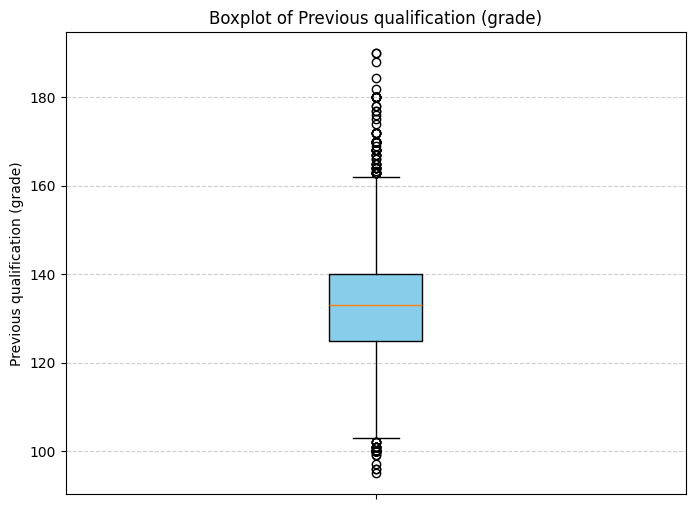

Admission grade


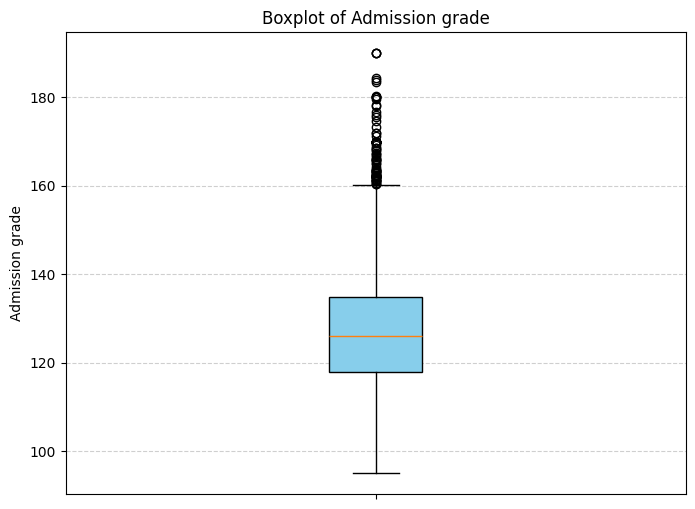

Curricular units 1st sem (grade)


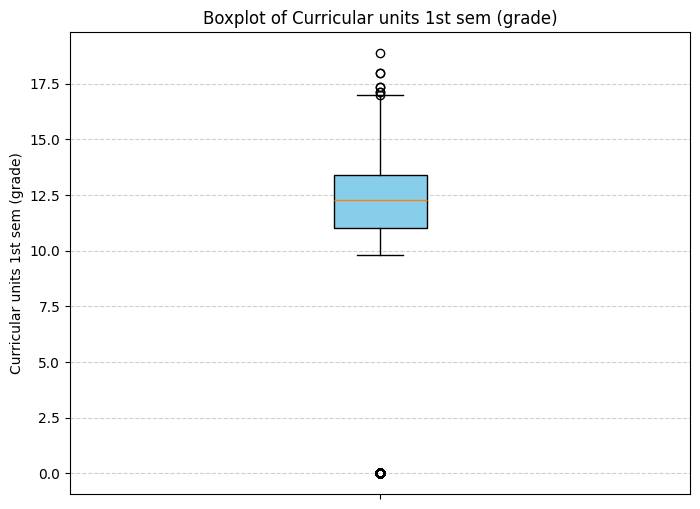

Curricular units 2nd sem (grade)


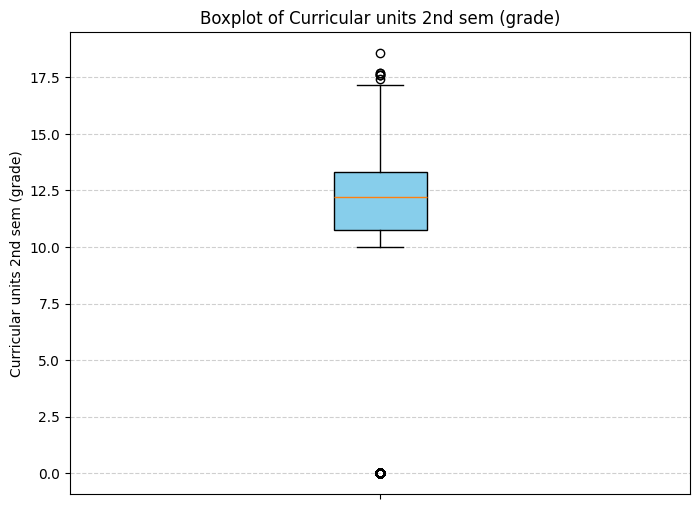

Unemployment rate


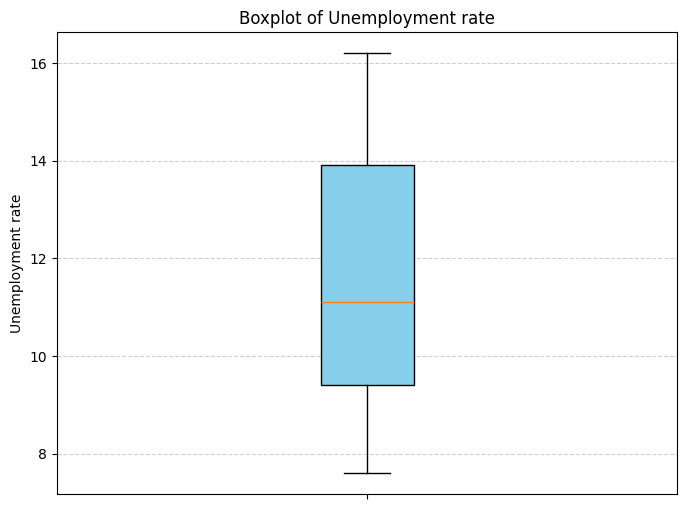

Inflation rate


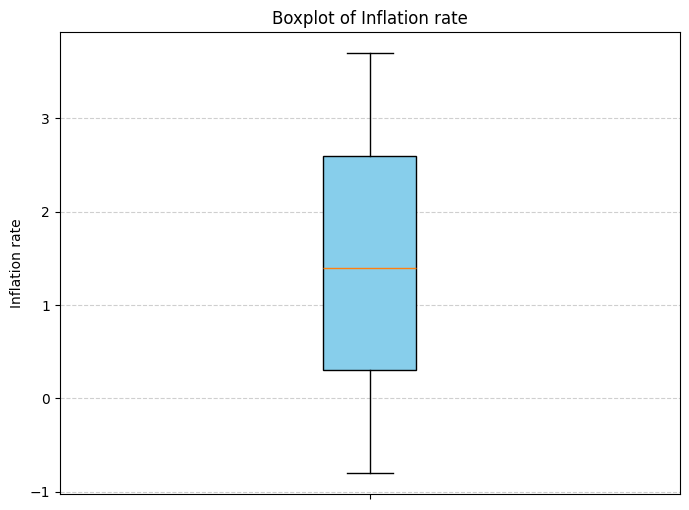

GDP


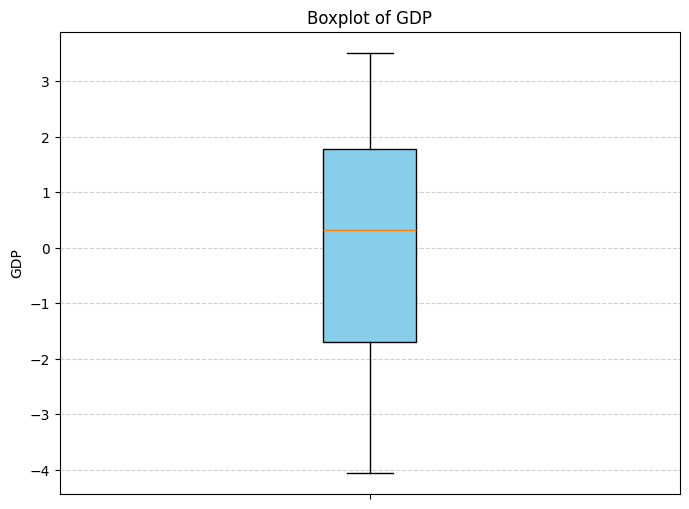

In [9]:
numerical_cols = [
    "Application order",
    "Age at enrollment",
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (without evaluations)",
    "Previous qualification (grade)",
    "Admission grade",
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (grade)",
    "Unemployment rate",
    "Inflation rate",
    "GDP"
]

# for col in numerical_cols:
#     print(col)
#     value_counts = df[col].value_counts()
#     value_counts.plot(kind='hist')
#     plt.ylabel("Count")
#     plt.xlabel(col)
#     plt.show()

# for col in numerical_cols:
#     print(col)
#     plt.figure(figsize=(8, 6))

#     # Plot histogram with horizontal orientation
#     plt.hist(df[col], orientation='vertical', color='skyblue', edgecolor='black')

#     plt.xlabel("Count")         # Count on the x-axis
#     plt.ylabel(col)             # Column values on the y-axis
#     plt.title(f"Histogram of {col}")
#     plt.grid(axis='x', linestyle='--', alpha=0.6)
#     plt.show()

# for col in numerical_cols:
#     print(col)
#     plt.figure(figsize=(8, 6))
    
#     # Plot boxplot
#     plt.boxplot(df[col], vert=True, patch_artist=True, boxprops=dict(facecolor='skyblue'))
    
#     plt.ylabel(col)             # Column values on the y-axis
#     plt.title(f"Boxplot of {col}")
#     plt.grid(axis='y', linestyle='--', alpha=0.6)
#     plt.show()

for col in numerical_cols:
    print(col)
    plt.figure(figsize=(8, 6))
    
    # Plot boxplot
    plt.boxplot(df[col], vert=True, patch_artist=True, boxprops=dict(facecolor='skyblue'))
    
    plt.ylabel(col)             # Column values on the y-axis
    plt.title(f"Boxplot of {col}")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    
    # Remove or customize the x-axis tick label
    plt.xticks([1], [''])  # This removes the label or you can replace '' with a custom label
    
    plt.show()


In [10]:
def handle_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    # print("IQR used")
    outlier_mask = (col < Q1 - 1.5 * IQR) | (col > Q3 + 1.5 * IQR)
    outlier_values = col[outlier_mask].unique().tolist()  # Remove duplicates and convert to list
    return outlier_values

In [11]:
outlier_cols = []
for col in numerical_cols:
    outliers = handle_outliers(df[col])
    if outliers == []:
        print(f"No outliers in {col} column\n")
    else:
        outlier_cols.append(col)
        print(f"Outliers in {col} column:")
        print(f"{outliers}\n")

Outliers in Application order column:
[5, 4, 6, 9]

Outliers in Age at enrollment column:
[45, 50, 37, 43, 55, 39, 35, 44, 36, 47, 38, 40, 42, 48, 49, 46, 41, 70, 60, 53, 51, 52, 54, 61, 58, 59, 57, 62]

Outliers in Curricular units 1st sem (credited) column:
[2, 3, 6, 7, 13, 4, 1, 5, 19, 11, 8, 10, 9, 15, 12, 14, 18, 17, 16, 20]

Outliers in Curricular units 1st sem (enrolled) column:
[0, 1, 12, 18, 21, 17, 16, 11, 14, 13, 15, 19, 23, 26]

Outliers in Curricular units 1st sem (evaluations) column:
[17, 18, 19, 21, 24, 22, 45, 20, 26, 29, 36, 32, 23, 27, 31, 28, 25, 33]

Outliers in Curricular units 1st sem (approved) column:
[18, 21, 11, 13, 12, 16, 14, 17, 19, 15, 20, 26]

Outliers in Curricular units 1st sem (without evaluations) column:
[1, 2, 4, 3, 6, 12, 10, 7, 5, 8]

Outliers in Curricular units 2nd sem (credited) column:
[1, 2, 5, 7, 4, 10, 3, 13, 9, 6, 11, 12, 8, 14, 15, 16, 18, 19]

Outliers in Curricular units 2nd sem (enrolled) column:
[0, 11, 12, 13, 19, 17, 1, 14, 15, 16,

Application order


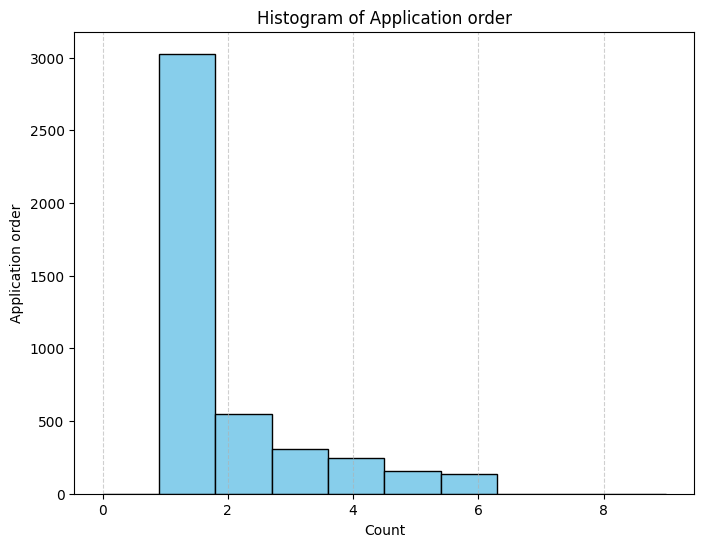

Age at enrollment


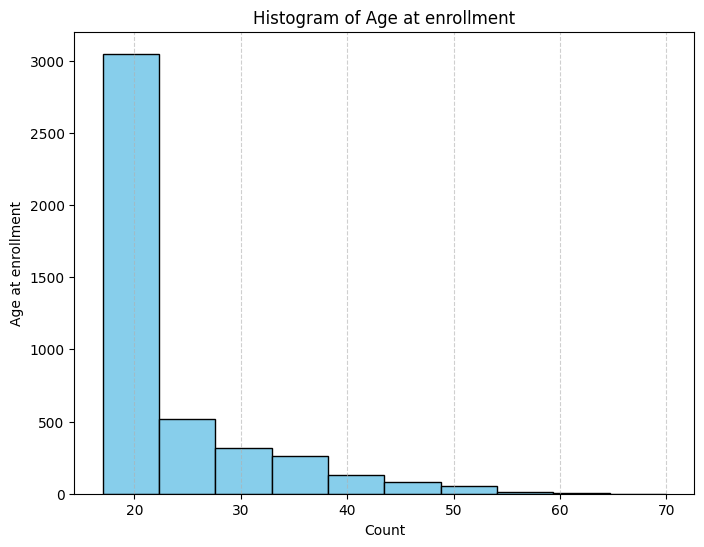

Curricular units 1st sem (credited)


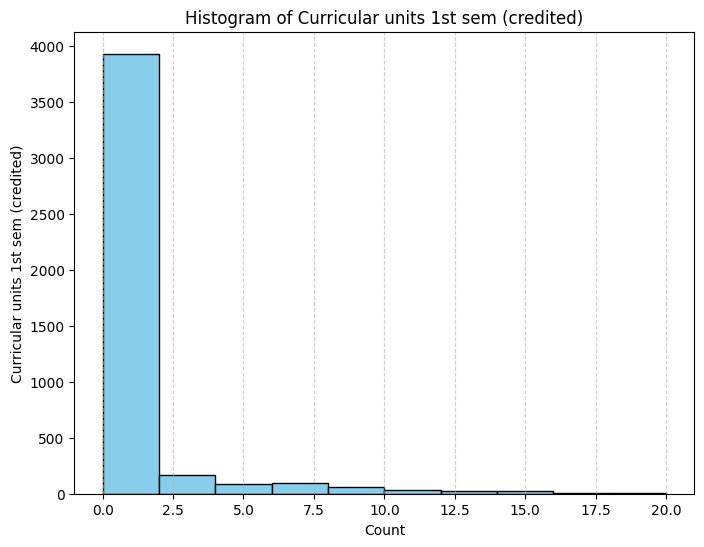

Curricular units 1st sem (enrolled)


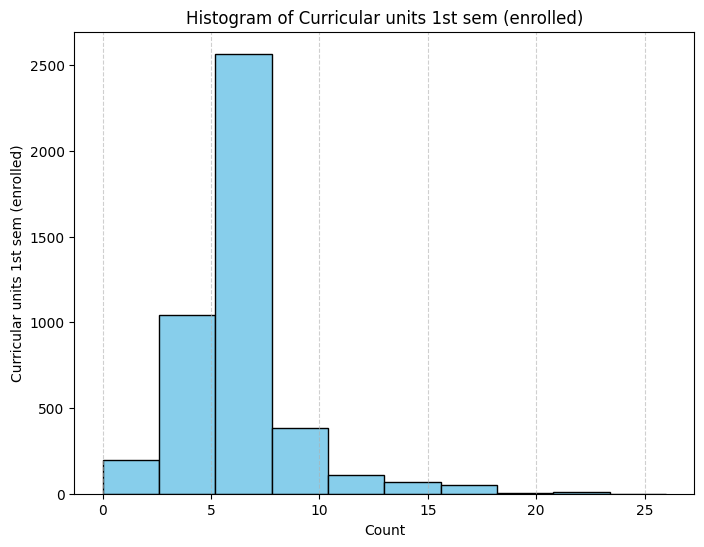

Curricular units 1st sem (evaluations)


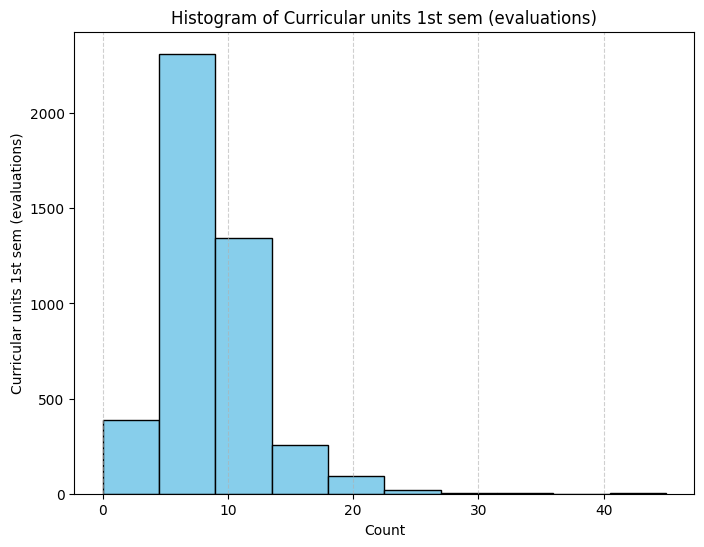

Curricular units 1st sem (approved)


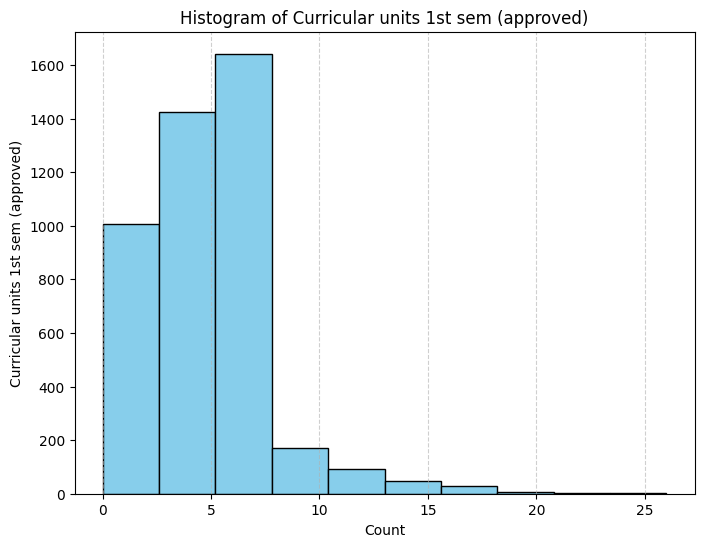

Curricular units 1st sem (without evaluations)


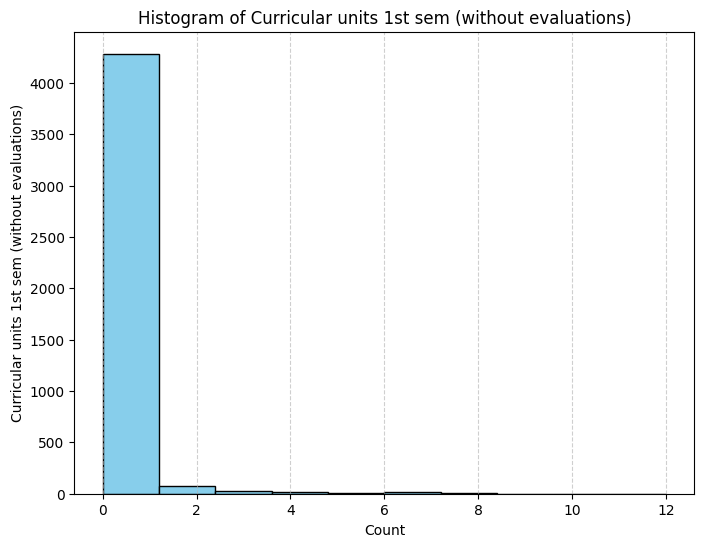

Curricular units 2nd sem (credited)


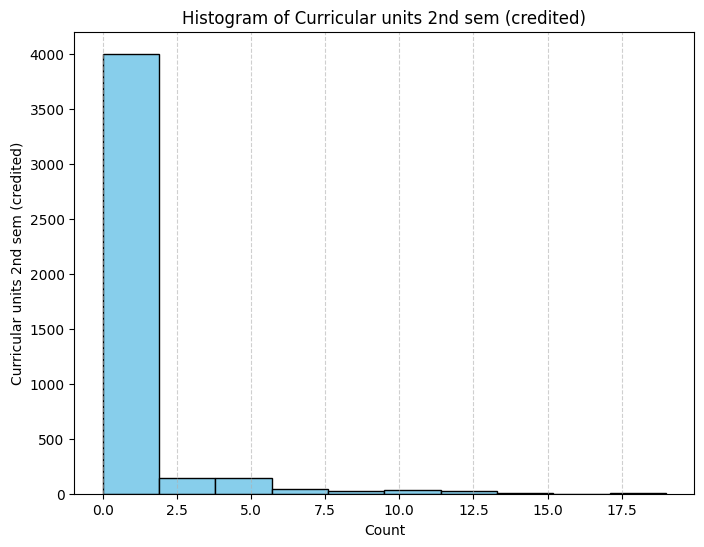

Curricular units 2nd sem (enrolled)


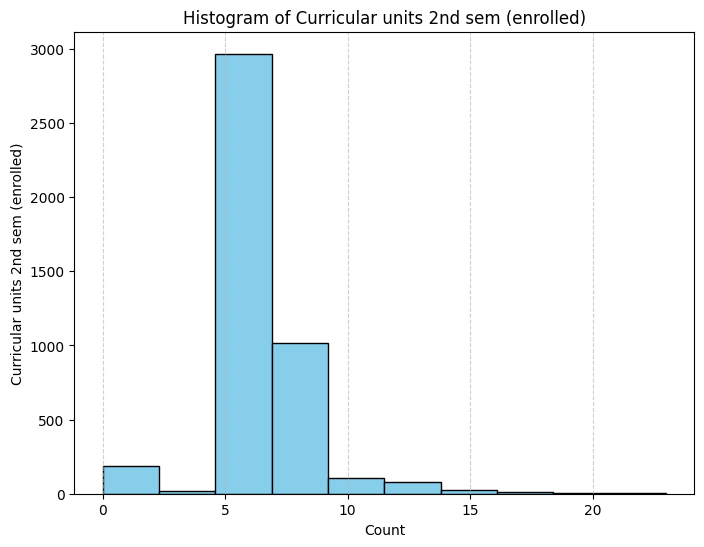

Curricular units 2nd sem (evaluations)


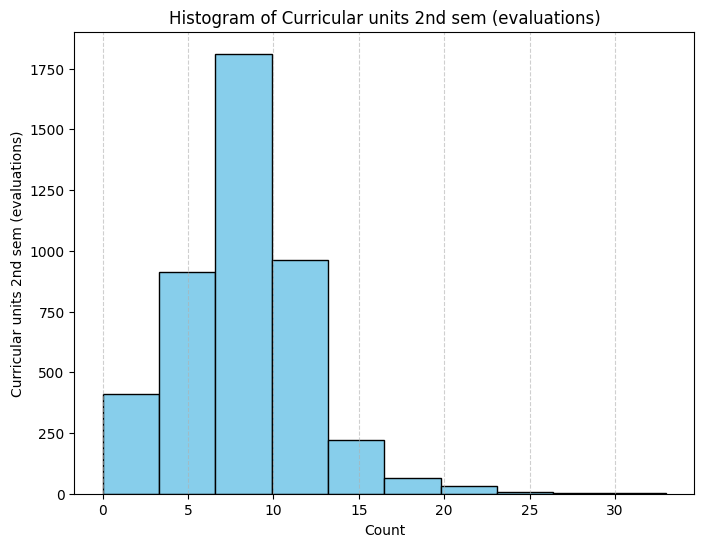

Curricular units 2nd sem (approved)


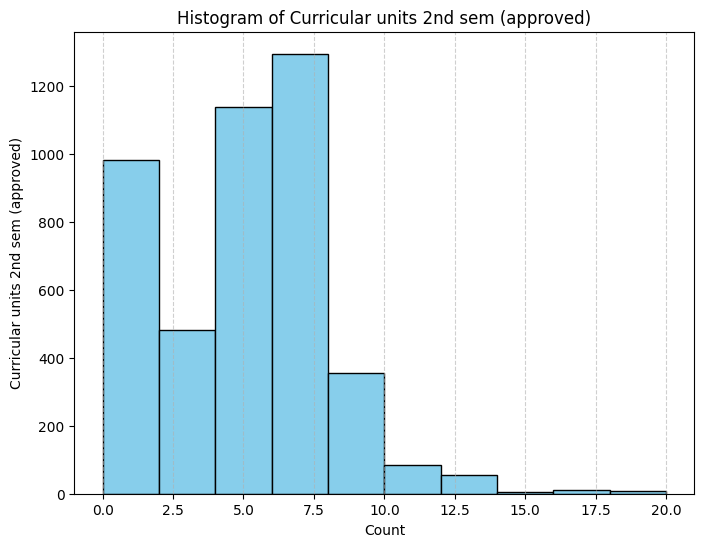

Curricular units 2nd sem (without evaluations)


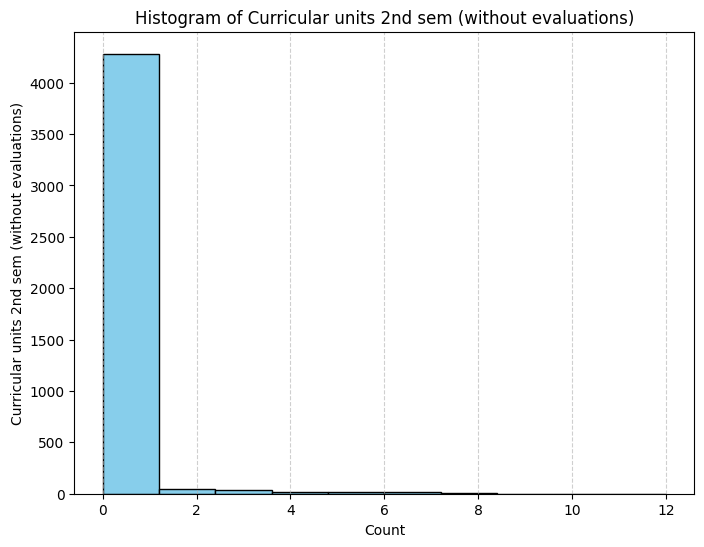

Previous qualification (grade)


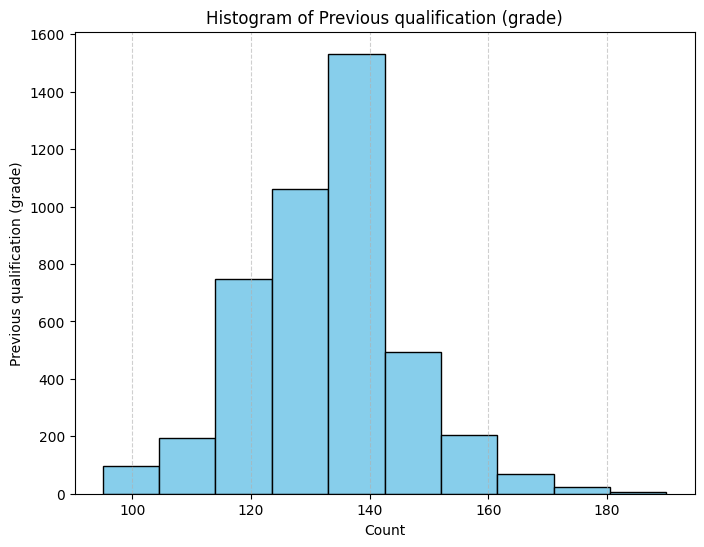

Admission grade


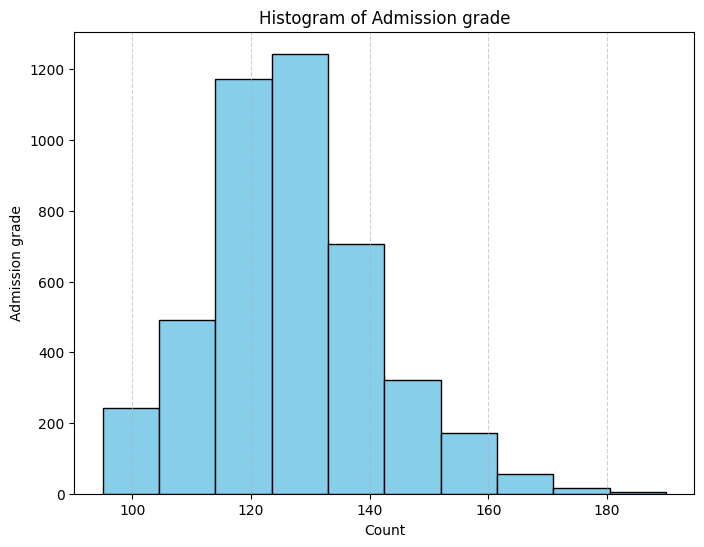

Curricular units 1st sem (grade)


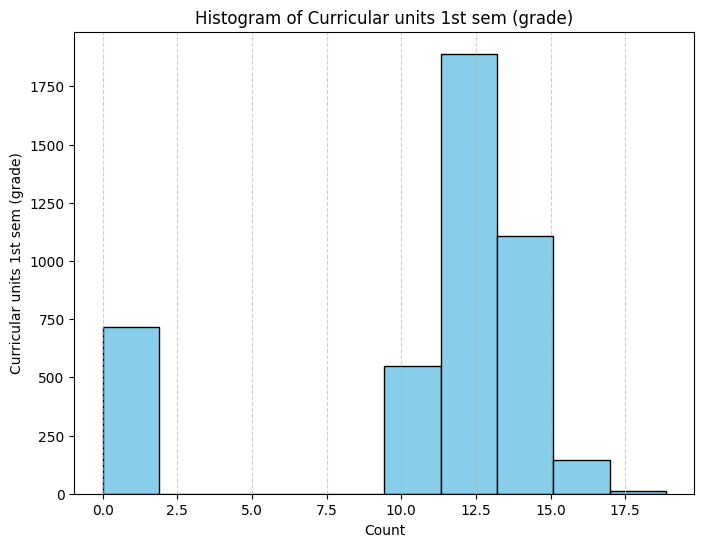

Curricular units 2nd sem (grade)


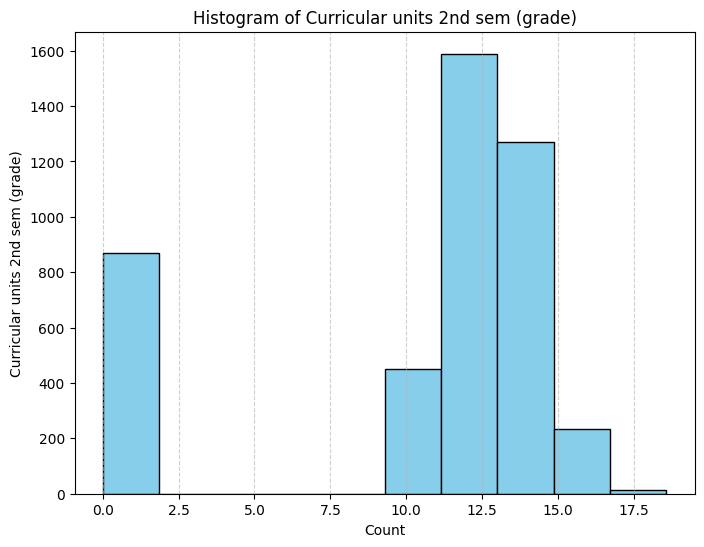

In [12]:
for col in outlier_cols:
    print(col)
    plt.figure(figsize=(8, 6))

    # Plot histogram with horizontal orientation
    plt.hist(df[col], orientation='vertical', color='skyblue', edgecolor='black')

    plt.xlabel("Count")         # Count on the x-axis
    plt.ylabel(col)             # Column values on the y-axis
    plt.title(f"Histogram of {col}")
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

In [13]:
outlier_cols

['Application order',
 'Age at enrollment',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (without evaluations)',
 'Previous qualification (grade)',
 'Admission grade',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (grade)']

In [14]:
df.head(20)

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,9,7,114.8,0,0,1,1,1,0,50,0,0,5,10,5,11.857143,0,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,7,10,128.4,1,0,0,1,0,1,18,0,0,7,9,7,13.300000,0,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,9,9,113.1,1,0,0,0,1,0,22,0,0,5,5,0,0.000000,0,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,9,9,129.3,0,0,0,1,0,1,21,1,0,6,8,6,13.875000,0,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,4,7,123.0,1,0,1,0,0,0,18,0,0,6,9,5,11.400000,0,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


### Investigating outliers
Outliers in the application order columns we can assume are meaningful 


Preprocessing:
Handle missing values (e.g., imputation or removal).
Encode categorical features (e.g., one-hot encoding).
Normalize or standardize numerical features (especially for Logistic Regression).
Split the data into training and testing sets (e.g., 80-20 split).
Benchmark Model:
Start with Logistic Regression to establish a baseline.
Fine-tune hyperparameters (e.g., C, solver, multi_class).
Improve with Random Forest:
Train and evaluate a Random Forest model.
Fine-tune hyperparameters (e.g., n_estimators, max_depth, max_features).
Improve Further with XGBoost:
Train and evaluate an XGBoost model.
Fine-tune hyperparameters (e.g., learning_rate, max_depth, n_estimators).
Interpretability:
Use SHAP or LIME to explain the predictions of your final model (e.g., XGBoost).

# Preprocessing data

In [15]:
df.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# ML workflow

In [16]:
# !pip install scikit.learn
from sklearn.model_selection import train_test_split
X = df.drop(columns=["Target"])
y = df['Target']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [18]:
for original_class, encoded_value in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"Original Class: {original_class} -> Encoded Value: {encoded_value}")

Original Class: Dropout -> Encoded Value: 0
Original Class: Enrolled -> Encoded Value: 1
Original Class: Graduate -> Encoded Value: 2


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Decision Tree - benchmark workflow

In [60]:
X_train.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
4419,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.60,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
1003,1,17,2,9147,1,1,122.0,1,19,19,7,7,116.1,1,0,0,1,0,1,19,0,0,5,8,5,11.20,0,0,5,5,3,11.000000,0,12.4,0.5,1.79
1252,1,17,3,9670,1,1,123.0,1,38,38,7,8,118.8,1,1,0,1,0,1,18,0,0,6,10,5,12.00,0,0,6,11,5,12.333333,0,11.1,0.6,2.02
936,1,39,1,9500,1,19,133.1,1,38,38,9,9,114.8,0,0,0,1,0,0,28,0,0,7,15,1,10.75,0,0,7,10,1,10.000000,0,13.9,-0.3,0.79
1548,2,7,1,9254,1,2,100.0,1,37,37,9,9,100.0,0,0,0,0,0,0,37,0,0,5,5,0,0.00,0,0,5,10,0,0.000000,0,10.8,1.4,1.74


In [61]:
y_test[:5]

array([2, 0, 2, 2, 0])

In [62]:
from sklearn import tree
# clf = tree.DecisionTreeClassifier()
clf = tree.DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train, y_train)

In [63]:
clf.score(X_test, y_test)

0.6799276672694394

In [64]:
from sklearn.metrics import accuracy_score
# Evaluate on training and testing sets
train_accuracy = accuracy_score(y_train, clf.predict(X_train))
test_accuracy = accuracy_score(y_test, clf.predict(X_test))

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Testing Accuracy: 0.68


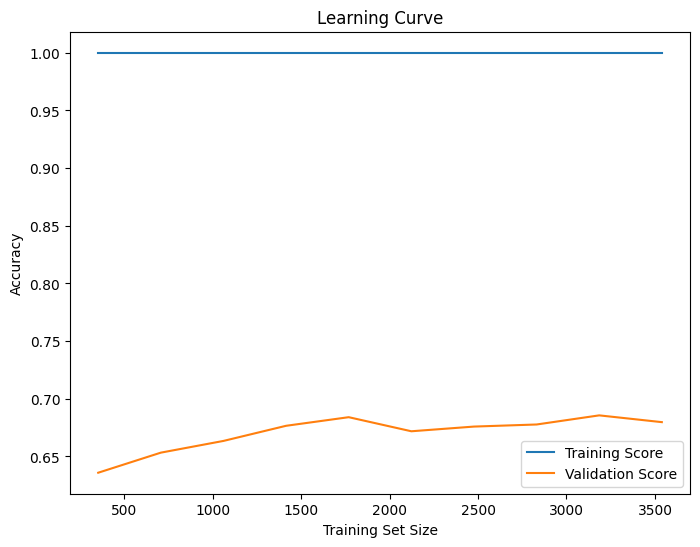

In [65]:
from sklearn.model_selection import learning_curve
import numpy as np
# Create a learning curve
train_sizes, train_scores, val_scores = learning_curve(
    tree.DecisionTreeClassifier(), X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

Using the default hyperparameters for decision treesTesting Accuracy and Training accuracy show that there is clear overfitting 

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# # Calculate accuracy
# accuracy = accuracy_score(y_test, clf.predict(X_test))

# # Calculate precision
# precision = precision_score(y_test, clf.predict(X_test), average='macro')

# # Calculate recall
# recall = recall_score(y_test, clf.predict(X_test), average='macro')

# # Calculate F1-score
# f1 = f1_score(y_test, clf.predict(X_test), average='macro')

# # Print the results
# print(f"Accuracy: {accuracy:.2f}")
# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"F1-Score: {f1:.2f}")

# Train a model on balanced data
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.66      0.68       355
           1       0.37      0.41      0.39       199
           2       0.80      0.79      0.79       552

    accuracy                           0.68      1106
   macro avg       0.62      0.62      0.62      1106
weighted avg       0.69      0.68      0.68      1106



# Decision Tree (Tuned)

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

param_dist = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy', 'log_loss'],  
    'splitter': ['best', 'random'], 
    'class_weight': [None, 'balanced']  # Handle class imbalance
}

In [90]:
# Initialize the decision tree
dt = DecisionTreeClassifier(random_state=42)

# Set up random search
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=1000,  # Number of parameter settings to sample
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    random_state=42
)

In [91]:
# Fit the random search
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", random_search.best_params_)

Best parameters: {'splitter': 'best', 'min_samples_split': 7, 'min_samples_leaf': 9, 'max_features': None, 'max_depth': 5, 'criterion': 'gini', 'class_weight': None}


In [92]:
random_search.score(X_test, y_test)

0.7396021699819169

In [93]:
from sklearn.metrics import accuracy_score
# Evaluate on training and testing sets
train_accuracy = accuracy_score(y_train, random_search.predict(X_train))
test_accuracy = accuracy_score(y_test, random_search.predict(X_test))

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.76
Testing Accuracy: 0.74


/Users/suhaibchoudhry/opt/anaconda3/envs/principles__of_ai_and_ml/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/suhaibchoudhry/opt/anaconda3/envs/principles__of_ai_and_ml/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/suhaibchoudhry/opt/anaconda3/envs/principles__of_ai_and_ml/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/suhaibchoudhry/opt/anaconda3/envs/principles__of_ai_and_ml/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/suhaibchoudhry/opt/anaconda3/envs/principles__of_ai_and_ml/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning

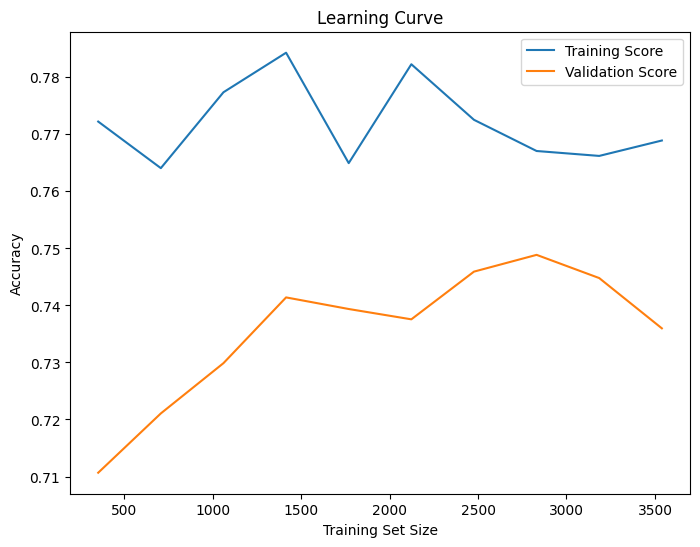

In [94]:
from sklearn.model_selection import learning_curve
import numpy as np
# Create a learning curve
train_sizes, train_scores, val_scores = learning_curve(
    random_search, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# # Calculate accuracy
# accuracy = accuracy_score(y_test, clf.predict(X_test))

# # Calculate precision
# precision = precision_score(y_test, clf.predict(X_test), average='macro')

# # Calculate recall
# recall = recall_score(y_test, clf.predict(X_test), average='macro')

# # Calculate F1-score
# f1 = f1_score(y_test, clf.predict(X_test), average='macro')

# # Print the results
# print(f"Accuracy: {accuracy:.2f}")
# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"F1-Score: {f1:.2f}")

# Train a model on balanced data
model = tree.DecisionTreeClassifier()
random_search.fit(X_train, y_train)

# Evaluate the model
y_pred = random_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74       355
           1       0.54      0.23      0.32       199
           2       0.73      0.97      0.83       552

    accuracy                           0.74      1106
   macro avg       0.70      0.62      0.63      1106
weighted avg       0.73      0.74      0.71      1106



/Users/suhaibchoudhry/opt/anaconda3/envs/principles__of_ai_and_ml/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


### Metric interpretation
68% of predicted instances were actually correct
62% 


In [96]:
### Go back and improve the decision tree using a grid search, looking at other features and stuff like that


# Random forest

In [188]:
# param_grid = {
#     'n_estimators':[20, 40, 60, 80, 100, 120, 140, 160, 180, 200],
#     'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
#     'max_features':['sqrt', 'log2', None],
#     'min_samples_split':[2, 3, 4, 5, 6, 7, 8, 9, 10],
#     'min_samples_leaf':[1, 2, 3, 4, 5] 
# }

# param_grid = {
#     'n_estimators':[20, 40, 60, 80, 100, 120, 140, 160, 180, 200],
#     'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#     'max_features':['sqrt', 'log2', None],
#     'min_samples_split':[2, 3, 4, 5, 6, 7, 8, 9, 10],
#     'min_samples_leaf':[1, 2, 3, 4, 5] 
# }

param_grid = {
    'n_estimators':[20, 40, 60, 80, 100, 120, 140, 160, 180, 200],
    'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 29, 20],
    'max_features':['sqrt', 'log2', None],
    'min_samples_split':[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 29, 20],
    'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 29, 20],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

In [189]:
# from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
# grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
# grid_search.fit(X_train, y_train)

In [191]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    rf, param_grid, n_iter=1000, cv=5, scoring="accuracy", n_jobs=-1, random_state=42, return_train_score=True
)
random_search.fit(X_train, y_train)

/Users/suhaibchoudhry/opt/anaconda3/envs/principles__of_ai_and_ml/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 29, 20],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 29, 20],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14, 15, 16,
                                                              17, 18, 29, 20],
                                        'n_estimators': [20, 40, 60, 80, 100,
                                                         120, 140, 160, 180,
                                                         200]},
                   random_state=42, return_train_score=True,
                   scoring='accuracy')

In [192]:
import pandas as pd

# Convert cv_results_ to a DataFrame
results_df = pd.DataFrame(random_search.cv_results_)

# Sort by the mean test score (accuracy) in descending order
sorted_results = results_df.sort_values(by='mean_test_score', ascending=False)

# Get the top 3 or 5 parameter combinations
top_n = 3  # Change this to 5 if you want the top 5
top_combinations = sorted_results.head(top_n)

# Display the top parameter combinations and their scores
print(f"Top {top_n} Parameter Combinations:")
print(top_combinations[['params', 'mean_test_score']])

Top 3 Parameter Combinations:
                                                params  mean_test_score
306  {'n_estimators': 60, 'min_samples_split': 5, '...         0.775769
969  {'n_estimators': 160, 'min_samples_split': 9, ...         0.774261
210  {'n_estimators': 100, 'min_samples_split': 3, ...         0.773958


In [193]:
sorted_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_class_weight,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
306,0.637590,0.020153,0.014282,0.005379,60,5,2,sqrt,20,entropy,balanced_subsample,False,"{'n_estimators': 60, 'min_samples_split': 5, '...",0.777108,0.769578,0.780120,0.779789,0.772247,0.775769,0.004186,1,0.999246,0.999623,1.000000,1.000000,0.999623,0.999699,0.000282
969,1.215431,0.031878,0.025318,0.003595,160,9,2,sqrt,15,log_loss,None,False,"{'n_estimators': 160, 'min_samples_split': 9, ...",0.778614,0.771084,0.774096,0.782805,0.764706,0.774261,0.006219,2,0.975509,0.975885,0.975885,0.976271,0.976648,0.976040,0.000388
210,0.932606,0.059894,0.024411,0.012843,100,3,1,log2,14,log_loss,balanced,False,"{'n_estimators': 100, 'min_samples_split': 3, ...",0.780120,0.772590,0.775602,0.764706,0.776772,0.773958,0.005217,3,0.999623,0.999246,0.996232,0.999247,0.997363,0.998342,0.001318
9,1.660615,0.065055,0.049521,0.017074,200,10,1,sqrt,17,gini,None,False,"{'n_estimators': 200, 'min_samples_split': 10,...",0.774096,0.772590,0.778614,0.776772,0.763198,0.773054,0.005352,4,0.976639,0.977769,0.974002,0.977778,0.978908,0.977019,0.001671
416,1.257185,0.038217,0.040246,0.008238,180,6,3,log2,20,log_loss,balanced,True,"{'n_estimators': 180, 'min_samples_split': 6, ...",0.781627,0.769578,0.763554,0.788839,0.760181,0.772756,0.010865,5,0.952148,0.954785,0.952148,0.958569,0.951412,0.953812,0.002641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,0.584414,0.035407,0.007536,0.002973,80,6,3,None,2,gini,balanced,False,"{'n_estimators': 80, 'min_samples_split': 6, '...",0.631024,0.631024,0.625000,0.645551,0.627451,0.632010,0.007144,996,0.628485,0.628485,0.632630,0.624859,0.629379,0.628768,0.002479
338,0.171838,0.034682,0.008612,0.010231,20,14,10,None,2,log_loss,balanced_subsample,False,"{'n_estimators': 20, 'min_samples_split': 14, ...",0.631024,0.626506,0.625000,0.645551,0.616893,0.628995,0.009453,997,0.628485,0.632253,0.632630,0.624859,0.634652,0.630576,0.003484
713,1.027535,0.025944,0.011834,0.002277,140,12,9,None,2,entropy,balanced,False,"{'n_estimators': 140, 'min_samples_split': 12,...",0.631024,0.626506,0.625000,0.645551,0.616893,0.628995,0.009453,997,0.628485,0.632253,0.632630,0.624859,0.634652,0.630576,0.003484
959,0.242294,0.010598,0.005424,0.002333,40,7,2,None,2,entropy,balanced,False,"{'n_estimators': 40, 'min_samples_split': 7, '...",0.631024,0.626506,0.625000,0.645551,0.616893,0.628995,0.009453,997,0.628485,0.632253,0.632630,0.624859,0.634652,0.630576,0.003484


In [194]:
temp_df = sorted_results[sorted_results["mean_train_score"]>=0.7]

In [195]:
temp_df['param_min_samples_leaf'].unique()

array([ 2,  1,  3,  4, 10,  5,  6, 16,  9,  8, 11, 13, 14, 17, 18,  7, 15,
       12, 20, 29])

In [196]:
# Step 1: Calculate the absolute difference between mean_train_score and mean_test_score
temp_df['score_diff'] = abs(temp_df['mean_train_score'] - temp_df['mean_test_score'])

# Step 2: Filter rows where the difference is at most 6% (0.06)
filtered_df = temp_df[temp_df['score_diff'] <= 0.05]
filtered_df

/var/folders/_8/glc3s29166l8gjv1qmrx90gc0000gn/T/ipykernel_36821/3141208039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['score_diff'] = abs(temp_df['mean_train_score'] - temp_df['mean_test_score'])


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_class_weight,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score,score_diff
641,0.264532,0.016805,0.010569,0.001877,60,15,9,log2,8,log_loss,None,True,"{'n_estimators': 60, 'min_samples_split': 15, ...",0.766566,0.768072,0.769578,0.773756,0.749623,0.765519,0.008302,42,0.800301,0.808591,0.802939,0.807156,0.809416,0.805681,0.003494,0.040162
557,0.328480,0.007717,0.004864,0.001502,20,13,17,None,17,log_loss,None,True,"{'n_estimators': 20, 'min_samples_split': 13, ...",0.772590,0.774096,0.759036,0.766214,0.751131,0.764614,0.008591,57,0.803316,0.806707,0.797664,0.807533,0.800000,0.803044,0.003791,0.038430
434,0.982313,0.020125,0.031734,0.009533,200,13,9,log2,7,entropy,None,False,"{'n_estimators': 200, 'min_samples_split': 13,...",0.762048,0.765060,0.769578,0.770739,0.749623,0.763410,0.007569,74,0.801809,0.805576,0.803316,0.805273,0.807910,0.804777,0.002081,0.041367
778,0.503141,0.007787,0.015785,0.004189,140,12,4,log2,6,gini,None,True,"{'n_estimators': 140, 'min_samples_split': 12,...",0.757530,0.762048,0.769578,0.775264,0.748115,0.762507,0.009433,96,0.794273,0.795780,0.793896,0.793220,0.797363,0.794907,0.001488,0.032399
862,0.386412,0.035285,0.017252,0.007486,80,15,3,log2,6,log_loss,None,True,"{'n_estimators': 80, 'min_samples_split': 15, ...",0.763554,0.763554,0.765060,0.772247,0.748115,0.762506,0.007883,99,0.792766,0.790505,0.790505,0.790584,0.796234,0.792119,0.002232,0.029612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.014246,0.020940,0.012018,0.006038,120,15,12,None,6,gini,balanced_subsample,False,"{'n_estimators': 120, 'min_samples_split': 15,...",0.694277,0.679217,0.691265,0.701357,0.686275,0.690478,0.007455,897,0.745667,0.724943,0.729088,0.733710,0.733333,0.733348,0.006938,0.042870
562,3.129677,0.052141,0.019957,0.003961,180,13,9,None,6,gini,balanced,False,"{'n_estimators': 180, 'min_samples_split': 13,...",0.700301,0.673193,0.698795,0.699849,0.678733,0.690174,0.011745,901,0.744160,0.725320,0.730972,0.737100,0.735970,0.734704,0.006305,0.044530
55,1.769335,0.069535,0.014188,0.006268,120,16,8,None,5,gini,balanced_subsample,False,"{'n_estimators': 120, 'min_samples_split': 16,...",0.706325,0.670181,0.661145,0.719457,0.684766,0.688375,0.021789,906,0.730972,0.717784,0.701583,0.747646,0.741243,0.727846,0.016567,0.039471
578,0.378297,0.013113,0.003806,0.001491,20,12,15,None,6,log_loss,balanced,False,"{'n_estimators': 20, 'min_samples_split': 12, ...",0.706325,0.676205,0.634036,0.695324,0.683258,0.679030,0.024742,944,0.735494,0.718915,0.694800,0.718644,0.703578,0.714286,0.014032,0.035256


In [197]:
filtered_df.head(50)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_class_weight,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score,score_diff
641,0.264532,0.016805,0.010569,0.001877,60,15,9,log2,8,log_loss,None,True,"{'n_estimators': 60, 'min_samples_split': 15, ...",0.766566,0.768072,0.769578,0.773756,0.749623,0.765519,0.008302,42,0.800301,0.808591,0.802939,0.807156,0.809416,0.805681,0.003494,0.040162
557,0.328480,0.007717,0.004864,0.001502,20,13,17,None,17,log_loss,None,True,"{'n_estimators': 20, 'min_samples_split': 13, ...",0.772590,0.774096,0.759036,0.766214,0.751131,0.764614,0.008591,57,0.803316,0.806707,0.797664,0.807533,0.800000,0.803044,0.003791,0.038430
434,0.982313,0.020125,0.031734,0.009533,200,13,9,log2,7,entropy,None,False,"{'n_estimators': 200, 'min_samples_split': 13,...",0.762048,0.765060,0.769578,0.770739,0.749623,0.763410,0.007569,74,0.801809,0.805576,0.803316,0.805273,0.807910,0.804777,0.002081,0.041367
778,0.503141,0.007787,0.015785,0.004189,140,12,4,log2,6,gini,None,True,"{'n_estimators': 140, 'min_samples_split': 12,...",0.757530,0.762048,0.769578,0.775264,0.748115,0.762507,0.009433,96,0.794273,0.795780,0.793896,0.793220,0.797363,0.794907,0.001488,0.032399
862,0.386412,0.035285,0.017252,0.007486,80,15,3,log2,6,log_loss,None,True,"{'n_estimators': 80, 'min_samples_split': 15, ...",0.763554,0.763554,0.765060,0.772247,0.748115,0.762506,0.007883,99,0.792766,0.790505,0.790505,0.790584,0.796234,0.792119,0.002232,0.029612
589,1.048995,0.114747,0.028211,0.005105,160,18,17,log2,17,gini,None,True,"{'n_estimators': 160, 'min_samples_split': 18,...",0.760542,0.768072,0.768072,0.769231,0.745098,0.762203,0.009095,110,0.792012,0.797287,0.799548,0.795104,0.793974,0.795585,0.002615,0.033382
382,0.744099,0.067334,0.020614,0.006101,140,7,17,log2,8,entropy,None,False,"{'n_estimators': 140, 'min_samples_split': 7, ...",0.751506,0.771084,0.766566,0.770739,0.748115,0.761602,0.009817,121,0.804446,0.804069,0.801809,0.804896,0.808286,0.804701,0.002084,0.043099
111,0.524872,0.023590,0.018682,0.002495,120,2,13,log2,10,log_loss,None,True,"{'n_estimators': 120, 'min_samples_split': 2, ...",0.756024,0.762048,0.772590,0.769231,0.748115,0.761602,0.008856,123,0.807084,0.805953,0.805576,0.809416,0.808286,0.807263,0.001434,0.045662
37,0.477685,0.027102,0.013982,0.003203,100,16,17,log2,7,log_loss,None,False,"{'n_estimators': 100, 'min_samples_split': 16,...",0.760542,0.763554,0.768072,0.764706,0.751131,0.761601,0.005763,125,0.795403,0.793896,0.794650,0.796610,0.798493,0.795810,0.001613,0.034209
151,0.789492,0.021538,0.023098,0.004192,180,7,5,sqrt,6,gini,None,False,"{'n_estimators': 180, 'min_samples_split': 7, ...",0.750000,0.762048,0.765060,0.779789,0.749623,0.761304,0.011141,128,0.805576,0.802939,0.802185,0.801507,0.806026,0.803647,0.001822,0.042343


In [198]:
filtered_df[filtered_df['mean_test_score']>=0.75]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_class_weight,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score,score_diff
641,0.264532,0.016805,0.010569,0.001877,60,15,9,log2,8,log_loss,None,True,"{'n_estimators': 60, 'min_samples_split': 15, ...",0.766566,0.768072,0.769578,0.773756,0.749623,0.765519,0.008302,42,0.800301,0.808591,0.802939,0.807156,0.809416,0.805681,0.003494,0.040162
557,0.328480,0.007717,0.004864,0.001502,20,13,17,None,17,log_loss,None,True,"{'n_estimators': 20, 'min_samples_split': 13, ...",0.772590,0.774096,0.759036,0.766214,0.751131,0.764614,0.008591,57,0.803316,0.806707,0.797664,0.807533,0.800000,0.803044,0.003791,0.038430
434,0.982313,0.020125,0.031734,0.009533,200,13,9,log2,7,entropy,None,False,"{'n_estimators': 200, 'min_samples_split': 13,...",0.762048,0.765060,0.769578,0.770739,0.749623,0.763410,0.007569,74,0.801809,0.805576,0.803316,0.805273,0.807910,0.804777,0.002081,0.041367
778,0.503141,0.007787,0.015785,0.004189,140,12,4,log2,6,gini,None,True,"{'n_estimators': 140, 'min_samples_split': 12,...",0.757530,0.762048,0.769578,0.775264,0.748115,0.762507,0.009433,96,0.794273,0.795780,0.793896,0.793220,0.797363,0.794907,0.001488,0.032399
862,0.386412,0.035285,0.017252,0.007486,80,15,3,log2,6,log_loss,None,True,"{'n_estimators': 80, 'min_samples_split': 15, ...",0.763554,0.763554,0.765060,0.772247,0.748115,0.762506,0.007883,99,0.792766,0.790505,0.790505,0.790584,0.796234,0.792119,0.002232,0.029612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,0.093871,0.027650,0.005290,0.001994,20,20,20,sqrt,6,entropy,None,True,"{'n_estimators': 20, 'min_samples_split': 20, ...",0.754518,0.745482,0.762048,0.770739,0.728507,0.752259,0.014509,336,0.772042,0.773173,0.771289,0.774011,0.774011,0.772905,0.001084,0.020646
413,0.168924,0.010191,0.009332,0.005214,40,16,13,sqrt,5,gini,None,False,"{'n_estimators': 40, 'min_samples_split': 16, ...",0.739458,0.759036,0.763554,0.764706,0.734540,0.752259,0.012699,336,0.776564,0.777317,0.781462,0.765725,0.778154,0.775844,0.005329,0.023586
377,0.640334,0.031539,0.019057,0.003604,140,20,20,sqrt,11,gini,None,True,"{'n_estimators': 140, 'min_samples_split': 20,...",0.737952,0.757530,0.757530,0.767722,0.737557,0.751658,0.011948,343,0.788244,0.789751,0.793519,0.793974,0.794727,0.792043,0.002561,0.040385
811,0.393916,0.028662,0.014083,0.003680,80,13,20,sqrt,18,entropy,None,True,"{'n_estimators': 80, 'min_samples_split': 13, ...",0.745482,0.753012,0.750000,0.766214,0.739065,0.750755,0.009046,359,0.785983,0.791258,0.794650,0.790584,0.792844,0.791064,0.002902,0.040309


In [199]:
import os
import multiprocessing

# Method 1: Using os.cpu_count()
print(f"Number of CPU cores (os.cpu_count()): {os.cpu_count()}")

# Method 2: Using multiprocessing.cpu_count()
print(f"Number of CPU cores (multiprocessing.cpu_count()): {multiprocessing.cpu_count()}")

Number of CPU cores (os.cpu_count()): 8
Number of CPU cores (multiprocessing.cpu_count()): 8


In [200]:
filtered_df[filtered_df["mean_train_score"]>=0.7]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_class_weight,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score,score_diff
641,0.264532,0.016805,0.010569,0.001877,60,15,9,log2,8,log_loss,None,True,"{'n_estimators': 60, 'min_samples_split': 15, ...",0.766566,0.768072,0.769578,0.773756,0.749623,0.765519,0.008302,42,0.800301,0.808591,0.802939,0.807156,0.809416,0.805681,0.003494,0.040162
557,0.328480,0.007717,0.004864,0.001502,20,13,17,None,17,log_loss,None,True,"{'n_estimators': 20, 'min_samples_split': 13, ...",0.772590,0.774096,0.759036,0.766214,0.751131,0.764614,0.008591,57,0.803316,0.806707,0.797664,0.807533,0.800000,0.803044,0.003791,0.038430
434,0.982313,0.020125,0.031734,0.009533,200,13,9,log2,7,entropy,None,False,"{'n_estimators': 200, 'min_samples_split': 13,...",0.762048,0.765060,0.769578,0.770739,0.749623,0.763410,0.007569,74,0.801809,0.805576,0.803316,0.805273,0.807910,0.804777,0.002081,0.041367
778,0.503141,0.007787,0.015785,0.004189,140,12,4,log2,6,gini,None,True,"{'n_estimators': 140, 'min_samples_split': 12,...",0.757530,0.762048,0.769578,0.775264,0.748115,0.762507,0.009433,96,0.794273,0.795780,0.793896,0.793220,0.797363,0.794907,0.001488,0.032399
862,0.386412,0.035285,0.017252,0.007486,80,15,3,log2,6,log_loss,None,True,"{'n_estimators': 80, 'min_samples_split': 15, ...",0.763554,0.763554,0.765060,0.772247,0.748115,0.762506,0.007883,99,0.792766,0.790505,0.790505,0.790584,0.796234,0.792119,0.002232,0.029612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.014246,0.020940,0.012018,0.006038,120,15,12,None,6,gini,balanced_subsample,False,"{'n_estimators': 120, 'min_samples_split': 15,...",0.694277,0.679217,0.691265,0.701357,0.686275,0.690478,0.007455,897,0.745667,0.724943,0.729088,0.733710,0.733333,0.733348,0.006938,0.042870
562,3.129677,0.052141,0.019957,0.003961,180,13,9,None,6,gini,balanced,False,"{'n_estimators': 180, 'min_samples_split': 13,...",0.700301,0.673193,0.698795,0.699849,0.678733,0.690174,0.011745,901,0.744160,0.725320,0.730972,0.737100,0.735970,0.734704,0.006305,0.044530
55,1.769335,0.069535,0.014188,0.006268,120,16,8,None,5,gini,balanced_subsample,False,"{'n_estimators': 120, 'min_samples_split': 16,...",0.706325,0.670181,0.661145,0.719457,0.684766,0.688375,0.021789,906,0.730972,0.717784,0.701583,0.747646,0.741243,0.727846,0.016567,0.039471
578,0.378297,0.013113,0.003806,0.001491,20,12,15,None,6,log_loss,balanced,False,"{'n_estimators': 20, 'min_samples_split': 12, ...",0.706325,0.676205,0.634036,0.695324,0.683258,0.679030,0.024742,944,0.735494,0.718915,0.694800,0.718644,0.703578,0.714286,0.014032,0.035256


In [201]:
##### ADD CLASSIFICATION REPORT, CONFUSION MATRIX, ACCURACY, RECALL, PRECISION, F1 SCORE - IN THE DECISION TREE STUFF TOO

In [202]:
filtered_df['param_max_depth'].unique()

array([ 8, 17,  7,  6, 10, 20, 13, 16, 18, 14, 15, 29, 12,  5, 11,  9,  4,
        1,  2,  3])

In [203]:
print(f"Best Parameters for Random Forest: {random_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {random_search.best_score_:.2f}")

Best Parameters for Random Forest: {'n_estimators': 60, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'entropy', 'class_weight': 'balanced_subsample', 'bootstrap': False}
Best Cross-Validation Accuracy: 0.78


In [204]:
rf = RandomForestClassifier(random_state=42, n_estimators=180, min_samples_split=9, min_samples_leaf=3, max_features='sqrt', max_depth=7)
rf.fit(X_train, y_train)
train_accuracy = accuracy_score(y_train, rf.predict(X_train))
test_accuracy = accuracy_score(y_test, rf.predict(X_test))

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.81
Testing Accuracy: 0.76


In [205]:
pd.DataFrame(random_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_class_weight,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.095938,0.007542,0.007039,0.002115,20,12,20,log2,15,gini,None,False,"{'n_estimators': 20, 'min_samples_split': 12, ...",0.754518,0.756024,0.760542,0.772247,0.743590,0.757384,0.009287,228,0.802185,0.807084,0.802562,0.812053,0.804520,0.805681,0.003629
1,1.694872,0.044445,0.028198,0.012083,160,2,11,None,3,gini,balanced,False,"{'n_estimators': 160, 'min_samples_split': 2, ...",0.695783,0.662651,0.662651,0.665158,0.659125,0.669074,0.013492,977,0.704974,0.678975,0.669179,0.661394,0.662900,0.675484,0.015990
2,0.547128,0.015325,0.020077,0.007988,100,2,13,log2,16,gini,None,False,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.762048,0.780120,0.766566,0.775264,0.742081,0.765216,0.013192,48,0.837604,0.842502,0.837980,0.840301,0.832768,0.838231,0.003250
3,0.800199,0.042819,0.021283,0.003075,140,29,2,sqrt,9,gini,balanced_subsample,False,"{'n_estimators': 140, 'min_samples_split': 29,...",0.757530,0.736446,0.748494,0.754148,0.751131,0.749550,0.007213,393,0.840995,0.837980,0.833459,0.835405,0.838041,0.837176,0.002566
4,0.445440,0.017230,0.003222,0.000334,20,16,2,None,7,entropy,None,False,"{'n_estimators': 20, 'min_samples_split': 16, ...",0.718373,0.715361,0.739458,0.730015,0.728507,0.726343,0.008652,788,0.798794,0.793896,0.782969,0.803766,0.791714,0.794228,0.007000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.117917,0.062304,0.011276,0.004009,60,6,5,None,11,gini,None,True,"{'n_estimators': 60, 'min_samples_split': 6, '...",0.771084,0.759036,0.766566,0.758673,0.746606,0.760393,0.008334,162,0.897513,0.899774,0.886963,0.902448,0.894539,0.896247,0.005322
996,0.495941,0.007901,0.013314,0.002674,180,29,20,sqrt,3,log_loss,balanced,True,"{'n_estimators': 180, 'min_samples_split': 29,...",0.739458,0.722892,0.736446,0.755656,0.716440,0.734178,0.013685,698,0.743406,0.745290,0.746797,0.737853,0.758945,0.746458,0.006939
997,0.191182,0.011674,0.006042,0.001714,40,16,9,log2,29,entropy,None,True,"{'n_estimators': 40, 'min_samples_split': 16, ...",0.769578,0.756024,0.769578,0.772247,0.745098,0.762505,0.010392,102,0.829314,0.836850,0.828937,0.830885,0.827495,0.830696,0.003260
998,0.905813,0.023060,0.004792,0.001284,40,7,18,None,29,entropy,None,False,"{'n_estimators': 40, 'min_samples_split': 7, '...",0.709337,0.731928,0.722892,0.736048,0.739065,0.727854,0.010742,779,0.790882,0.792766,0.792389,0.795857,0.796234,0.793625,0.002077


In [206]:
# print(f"Best Parameters for Random Forest: {grid_search.best_params_}")
# print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.2f}")

In [207]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=9,
                       n_estimators=180, random_state=42)

In [208]:
y_pred = rf.predict(X_test)

In [209]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7613019891500904


In [210]:
from sklearn.metrics import accuracy_score
# Evaluate on training and testing sets
train_accuracy = accuracy_score(y_train, rf.predict(X_train))
test_accuracy = accuracy_score(y_test, rf.predict(X_test))

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.81
Testing Accuracy: 0.76


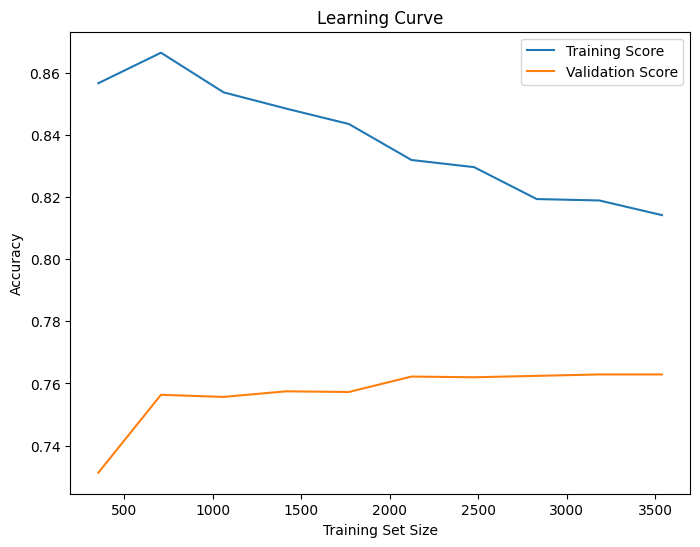

In [211]:
from sklearn.model_selection import learning_curve
import numpy as np
# Create a learning curve
train_sizes, train_scores, val_scores = learning_curve(
    rf, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [212]:
# Evaluate the model
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       355
           1       0.64      0.27      0.38       199
           2       0.76      0.95      0.84       552

    accuracy                           0.76      1106
   macro avg       0.73      0.65      0.66      1106
weighted avg       0.75      0.76      0.74      1106



# |These graphs i think we would need to consider after filtering down from the outlier data

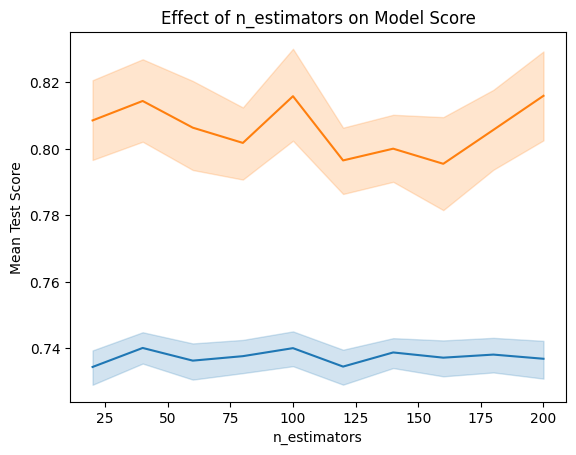

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Plotting the effect of `n_estimators` on the score
sns.lineplot(x='param_n_estimators', y='mean_test_score', data=random_search.cv_results_)
sns.lineplot(x='param_n_estimators', y='mean_train_score', data=random_search.cv_results_)
plt.title('Effect of n_estimators on Model Score')
plt.xlabel('n_estimators')
plt.ylabel('Mean Test Score')
plt.show()

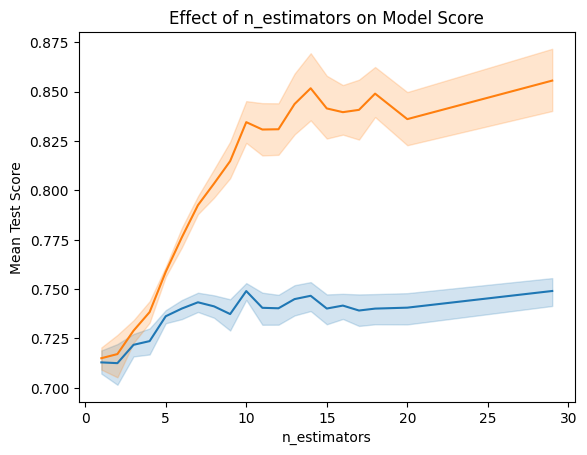

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Plotting the effect of `n_estimators` on the score
sns.lineplot(x='param_max_depth', y='mean_test_score', data=random_search.cv_results_)
sns.lineplot(x='param_max_depth', y='mean_train_score', data=random_search.cv_results_)
plt.title('Effect of n_estimators on Model Score')
plt.xlabel('n_estimators')
plt.ylabel('Mean Test Score')
plt.show()

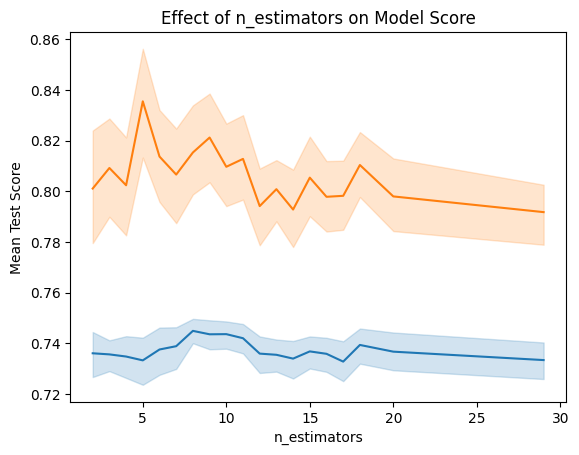

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Plotting the effect of `n_estimators` on the score
sns.lineplot(x='param_min_samples_split', y='mean_test_score', data=random_search.cv_results_)
sns.lineplot(x='param_min_samples_split', y='mean_train_score', data=random_search.cv_results_)
plt.title('Effect of n_estimators on Model Score')
plt.xlabel('n_estimators')
plt.ylabel('Mean Test Score')
plt.show()

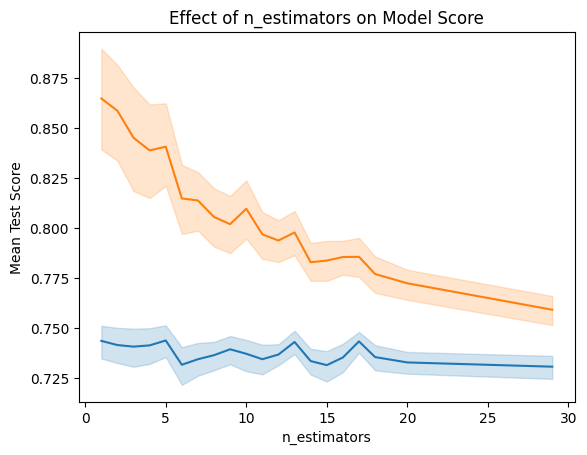

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Plotting the effect of `n_estimators` on the score
sns.lineplot(x='param_min_samples_leaf', y='mean_test_score', data=random_search.cv_results_)
sns.lineplot(x='param_min_samples_leaf', y='mean_train_score', data=random_search.cv_results_)
plt.title('Effect of n_estimators on Model Score')
plt.xlabel('n_estimators')
plt.ylabel('Mean Test Score')
plt.show()

In [216]:
random_search.cv_results_

{'mean_fit_time': array([9.59380150e-02, 1.69487200e+00, 5.47127867e-01, 8.00198984e-01,
        4.45440197e-01, 4.71970320e-01, 3.76751862e+00, 7.50083923e-02,
        5.36699486e-01, 1.66061544e+00, 2.18749723e+00, 2.89866638e+00,
        2.33433247e+00, 4.58719587e-01, 5.04861221e+00, 8.33398104e-01,
        6.07706833e-01, 7.42509985e-01, 6.82265091e-01, 2.78687382e-01,
        2.15389538e+00, 4.32045460e-01, 1.99523258e-01, 5.03494310e-01,
        9.38926697e-01, 5.21279788e+00, 2.89354038e-01, 1.90449018e+00,
        5.58123636e-01, 7.42709446e-01, 7.77146149e-01, 1.42685599e+00,
        8.96700859e-02, 5.29057455e-01, 1.74332666e+00, 2.27869735e+00,
        8.72142887e-01, 4.77685022e-01, 5.41908264e-02, 1.05364485e+00,
        1.87986913e+00, 9.02928257e-01, 6.02707381e+00, 4.03374386e-01,
        2.79196072e-01, 5.31657410e-01, 1.46204648e+00, 3.37063789e-01,
        1.40313416e+00, 1.12680745e+00, 3.93398190e-01, 4.80759811e-01,
        6.17015791e-01, 3.31634908e+00, 1.48179

In [218]:
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_class_weight,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.095938,0.007542,0.007039,0.002115,20,12,20,log2,15,gini,None,False,"{'n_estimators': 20, 'min_samples_split': 12, ...",0.754518,0.756024,0.760542,0.772247,0.743590,0.757384,0.009287,228,0.802185,0.807084,0.802562,0.812053,0.804520,0.805681,0.003629
1,1.694872,0.044445,0.028198,0.012083,160,2,11,None,3,gini,balanced,False,"{'n_estimators': 160, 'min_samples_split': 2, ...",0.695783,0.662651,0.662651,0.665158,0.659125,0.669074,0.013492,977,0.704974,0.678975,0.669179,0.661394,0.662900,0.675484,0.015990
2,0.547128,0.015325,0.020077,0.007988,100,2,13,log2,16,gini,None,False,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.762048,0.780120,0.766566,0.775264,0.742081,0.765216,0.013192,48,0.837604,0.842502,0.837980,0.840301,0.832768,0.838231,0.003250
3,0.800199,0.042819,0.021283,0.003075,140,29,2,sqrt,9,gini,balanced_subsample,False,"{'n_estimators': 140, 'min_samples_split': 29,...",0.757530,0.736446,0.748494,0.754148,0.751131,0.749550,0.007213,393,0.840995,0.837980,0.833459,0.835405,0.838041,0.837176,0.002566
4,0.445440,0.017230,0.003222,0.000334,20,16,2,None,7,entropy,None,False,"{'n_estimators': 20, 'min_samples_split': 16, ...",0.718373,0.715361,0.739458,0.730015,0.728507,0.726343,0.008652,788,0.798794,0.793896,0.782969,0.803766,0.791714,0.794228,0.007000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.117917,0.062304,0.011276,0.004009,60,6,5,None,11,gini,None,True,"{'n_estimators': 60, 'min_samples_split': 6, '...",0.771084,0.759036,0.766566,0.758673,0.746606,0.760393,0.008334,162,0.897513,0.899774,0.886963,0.902448,0.894539,0.896247,0.005322
996,0.495941,0.007901,0.013314,0.002674,180,29,20,sqrt,3,log_loss,balanced,True,"{'n_estimators': 180, 'min_samples_split': 29,...",0.739458,0.722892,0.736446,0.755656,0.716440,0.734178,0.013685,698,0.743406,0.745290,0.746797,0.737853,0.758945,0.746458,0.006939
997,0.191182,0.011674,0.006042,0.001714,40,16,9,log2,29,entropy,None,True,"{'n_estimators': 40, 'min_samples_split': 16, ...",0.769578,0.756024,0.769578,0.772247,0.745098,0.762505,0.010392,102,0.829314,0.836850,0.828937,0.830885,0.827495,0.830696,0.003260
998,0.905813,0.023060,0.004792,0.001284,40,7,18,None,29,entropy,None,False,"{'n_estimators': 40, 'min_samples_split': 7, '...",0.709337,0.731928,0.722892,0.736048,0.739065,0.727854,0.010742,779,0.790882,0.792766,0.792389,0.795857,0.796234,0.793625,0.002077


# XGBoost

In [169]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize the XGBoost classifier
xgb = XGBClassifier()

# Train the model
xgb.fit(X_train, y_train)

# Make predictions
y_pred = xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7514


In [170]:
# Train XGBoost model
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=18,
    learning_rate=0.1,
    random_state=42
)
xgb.fit(X_train, y_train)

# Make predictions
y_pred = xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7676


In [171]:
help(XGBClassifier)

Help on class XGBClassifier in module xgboost.sklearn:

class XGBClassifier(sklearn.base.ClassifierMixin, XGBModel)
 |  XGBClassifier(*, objective: Union[str, xgboost.sklearn._SklObjWProto, Callable[[Any, Any], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic', **kwargs: Any) -> None
 |  
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  See :doc:`/python/sklearn_estimator` for more information.
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : Optional[int]
 |          Number of boosting rounds.
 |  
 |      max_depth :  typing.Optional[int]
 |  
 |          Maximum tree depth for base learners.
 |  
 |      max_leaves : typing.Optional[int]
 |  
 |          Maximum number of leaves; 0 indicates no limit.
 |  
 |      max_bin : typing.Optional[int]
 |  
 |          If using histogram-based algorithm, maximum number of bins per feature
 |  
 |      grow_policy : typing.Optional[str]
 |  
 |          Tree growing policy.
 |  
 |   

In [174]:
# !pip install scikit-learn==1.5.2
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Initialize XGBClassifier
xgb = XGBClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators':[20, 40, 60, 80, 100, 120, 140, 160, 180, 200],
    'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 29, 20],
    'learning_rate': uniform(0.01, 0.3),
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': uniform(0, 5),
    'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1),
}

# Run RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb, param_grid, n_iter=100, cv=5, scoring="accuracy", n_jobs=-1, random_state=42
)
random_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'colsample_bytree': 0.9, 'gamma': 0.4707849413428006, 'learning_rate': 0.10342399281738825, 'max_depth': 20, 'min_child_weight': 5, 'n_estimators': 200, 'reg_alpha': 0.7633644230039109, 'reg_lambda': 0.8069129770507795, 'subsample': 0.8}


In [175]:
# Fit the random search
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", random_search.best_params_)

Best parameters: {'colsample_bytree': 0.9, 'gamma': 0.4707849413428006, 'learning_rate': 0.10342399281738825, 'max_depth': 20, 'min_child_weight': 5, 'n_estimators': 200, 'reg_alpha': 0.7633644230039109, 'reg_lambda': 0.8069129770507795, 'subsample': 0.8}


In [176]:
random_search.score(X_test, y_test)

0.7631103074141049

In [177]:
from sklearn.metrics import accuracy_score
# Evaluate on training and testing sets
train_accuracy = accuracy_score(y_train, random_search.predict(X_train))
test_accuracy = accuracy_score(y_test, random_search.predict(X_test))

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.97
Testing Accuracy: 0.76


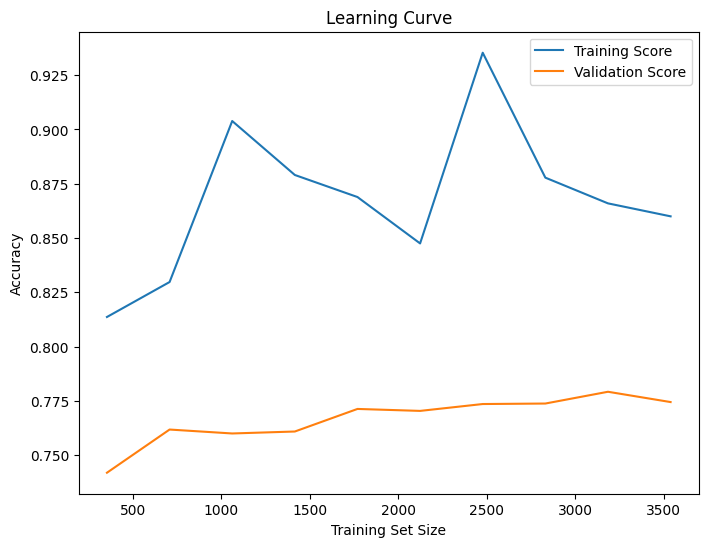

In [178]:
from sklearn.model_selection import learning_curve
import numpy as np
# Create a learning curve
train_sizes, train_scores, val_scores = learning_curve(
    random_search, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# # Calculate accuracy
# accuracy = accuracy_score(y_test, clf.predict(X_test))

# # Calculate precision
# precision = precision_score(y_test, clf.predict(X_test), average='macro')

# # Calculate recall
# recall = recall_score(y_test, clf.predict(X_test), average='macro')

# # Calculate F1-score
# f1 = f1_score(y_test, clf.predict(X_test), average='macro')

# # Print the results
# print(f"Accuracy: {accuracy:.2f}")
# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"F1-Score: {f1:.2f}")

# Train a model on balanced data
model = tree.DecisionTreeClassifier()1
random_search.fit(X_train, y_train)

# Evaluate the model
y_pred = random_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       355
           1       0.53      0.44      0.48       199
           2       0.80      0.90      0.85       552

    accuracy                           0.76      1106
   macro avg       0.71      0.69      0.70      1106
weighted avg       0.76      0.76      0.76      1106



In [168]:
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [122]:
xgb = XGBClassifier(colsample_bytree=0.8940284175215543, eval_metric='mlogloss', gamma=0.4017404651924243, learning_rate=0.09461037177139194, max_depth=4, min_child_weight=5, n_estimators=148, num_class=3, objective='multi:softmax', reg_alpha=0.4126176769114265, reg_lambda=0.37201808579278317, subsample=0.9105651842967988,random_state=42)

In [123]:
from sklearn.metrics import accuracy_score
# Evaluate on training and testing sets
xgb = xgb.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, xgb.predict(X_train))
test_accuracy = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.88
Testing Accuracy: 0.77


In [124]:
import sklearn
import xgboost

print("scikit-learn version:", sklearn.__version__)
print("XGBoost version:", xgboost.__version__)

scikit-learn version: 1.5.2
XGBoost version: 3.0.0


/Users/suhaibchoudhry/opt/anaconda3/envs/principles__of_ai_and_ml/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Figure size 640x480 with 0 Axes>

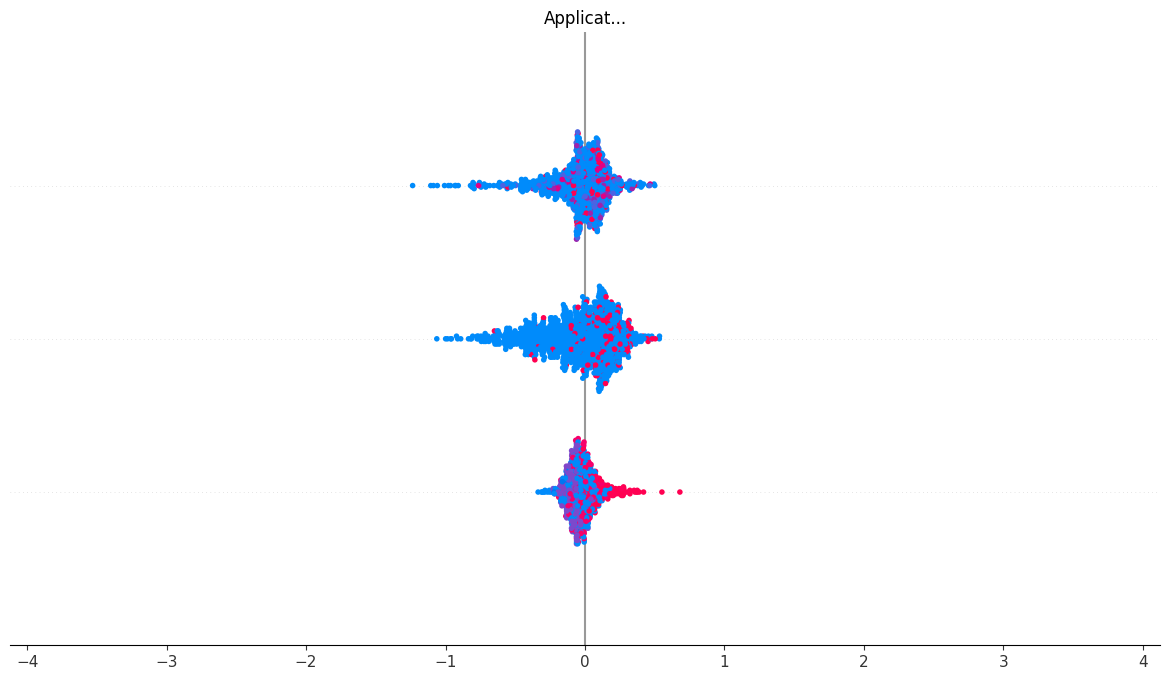

In [125]:
!pip install shap
import shap

# Train an XGBoost model
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test)

# Stacking

In [126]:
# Define base models
base_models = [
    ('random_forest', RandomForestClassifier(random_state=42,max_depth=6)),
    ('decision_tree', tree.DecisionTreeClassifier(random_state=42,max_depth=4)),
    ('xgboost', XGBClassifier(random_state=42))
]

In [127]:
# Define meta-model (Decision Tree)
meta_model = tree.DecisionTreeClassifier(random_state=42,max_depth=4)

In [128]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
# Create stacking classifier
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,  # Use 5-fold cross-validation to generate base model predictions
    stack_method='auto',  # Use 'predict_proba' if possible, otherwise 'predict'
    n_jobs=-1  # Use all available CPU cores
)

In [129]:
# Train the stacking model
stacking_model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('random_forest',
                                RandomForestClassifier(max_depth=6,
                                                       random_state=42)),
                               ('decision_tree',
                                DecisionTreeClassifier(max_depth=4,
                                                       random_state=42)),
                               ('xgboost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None, ...))],
                   final_estimator=DecisionTreeClassifier(max_depth=4,
                                                          random_state=42),
                   n_jobs=-1)

In [130]:
# Make predictions
y_pred = stacking_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Model Accuracy: {accuracy:.4f}")

Stacking Model Accuracy: 0.7532


In [131]:
!pip install seaborn

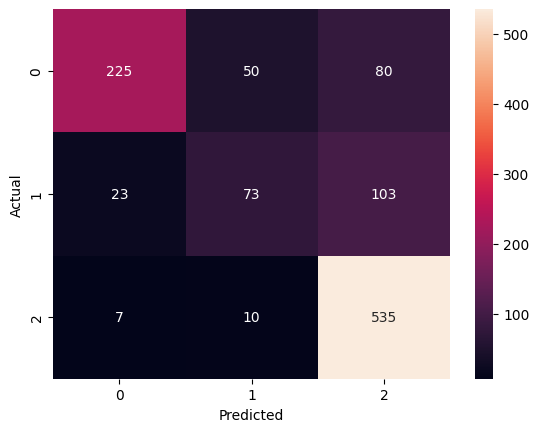

In [132]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [133]:
cm

array([[225,  50,  80],
       [ 23,  73, 103],
       [  7,  10, 535]])

# What I need to do
* Set up the notebook in a way so that it can be run automatically so that we can evaluate everything in the notebook in one run without the risk of overwriting existing variables
* Explore/check outliers